Maciej Filipowicz - Sentiment Classification - 10.03.2019

# Dataset description and my assumptions

## Dataset description 

**Challenge Description:**
<br>
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")
</br>

**Goal:**
<br>Predict sentiment based in Twitter dataset. 
</br>

**Dataset Description:**
>_tweet id_
<br>Description: Tweet ID </br>
<br>Type: Numerical </br>
<br>Values: integer </br>

>_airline sentiment_
<br>Description: Response variable covering sentiment regarding the airline service </br>
<br>Type: Categorical </br>
<br>Values: positive, neutral, negative </br>

>_airline sentiment confidence_
<br>Description: Score representing the strength of sentiment</br>
<br>Type: Numerical </br>
<br>Values: float </br>

>_negative reason_
<br>Description: Reason of negative sentiment</br>
<br>Type: Categorical </br>
<br>Values: string </br>

>_negative reason confidence_
<br>Description: Score representing the strength of negative reason </br>
<br>Type: Numerical </br>
<br>Values: float </br>    

>_airline_
<br>Description: Type of Airlines </br>
<br>Type: Categorical  </br>
<br>Values: string </br> 

>_airline sentiment gold_
<br>Description: Sentiment provided by gold passengers</br>
<br>Type: Categorical </br>
<br>Values: positive, neutral, negative </br>
  
>_name_
<br>Description: Twitter user </br>
<br>Type: Categorical </br>
<br>Values: string </br>

>_negative reason gold_
<br>Description: Reason of negative sentiment provided by gold passengers </br>
<br>Type: Categorical </br>
<br>Values: string </br> 

>_retweet count_
<br>Description: Number of times a Tweet has been retweeted </br>
<br>Type: Numerical  </br>
<br>Values: integer </br> 

>_text_
<br>Description: Tweet text  </br>
<br>Type: Categorical </br>
<br>Values: string </br> 


>_tweet coord_
<br>Description: Coordinates of the Twitter user at the moment of Tweet creation </br>
<br>Type: Numerical </br>
<br>Values: Geo Coordinates </br> 

>_tweet created_
<br>Description: Timestamp of Tweet creation </br>
<br>Type: Numerical </br>
<br>Values: Timestamp </br> 

>_tweet location_
<br>Description: Location of user at the moment of Tweeter creation </br>
<br>Type: Categorical </br>
<br>Values: Strings </br> 

>_user timezone_
<br>Description: Uset Timezone </br>
<br>Type: Categorical </br>
<br>Values: Strings </br> 

## My assumptions

>**Motivation of choosing UMLFIT Twitter challenge:**
<br> I considered Twitter challenge as most appealing to me from given challenges due to several reasons. First of all I have econometrics & statistics rather than computer science education, therefore I consider NLP in general as more important skill for my data science path. A chance to experiment with this use case boosts slightly my skills further (I think it is more interesting and important for me than image recognition and CNNs). Secondly being familiar that transfer learning is nowadays one of the hottest topic in the NLP, it would be a great chance to see what Jeremy Howard & Sebastian Ruder prepared in this matter (of course at my basic level) after watching the fast.ai lesson in this context. 

>**Assumptions regarding analysis:**
* I plan to base my sentiment classifier only on the _Twitter text_ as a predictor and discard other variables. This approach might be questionable, because hypotheses about other features having an impact on sentiment sound reasonable. For instance a time of tweet (maybe morning) or location (particular US state) might show some sentiment patterns towards positive or negative direction. I decided however after reading about similar problems that my analysis will be based on Twitter text only (other features might be used for training sample selection (as filters), more details during analysis).
* Exploratory Data analysis covers not only Tweet text, but also other selected features to get the feeling what this dataset represents. However using certain fields in EDA section does not mean that they will be used in algorithms section.
* I have decided to prepare 3-classes sentiment analysis: _positive, negative and neutral_ rather than _positive versus negative_ only (2-class). It might be stated that predicting _neutral_ tweets has no application, however I think that this class would be the most difficult to predict, therefore I incorporate it in analysis deliberately to see if I can predict it accurately.
* Having read similar analyses done on Kaggle / Github, I have already got some sort of sense of the accuracy level I should aim for. It should be higher than 80% of accuracy to claim that my model is fine (most common analyses reach from 75% till 80% accuracy on test sample, anything above 85% looks like SOTA), as example: 
    * A Support Vector Machine algorithm (https://www.kaggle.com/langkilde/linear-svm-classification-of-sentiment-in-tweets) reaches 78.5% accuracy on test set.
    * Here (https://cs224d.stanford.edu/reports/yixin.pdf) the accuracy for unbalanced data reaches 74.4% of accuracy and for balanced dataset 88% (3-layer GRU). 
* Before I apply ULMFIT algorithm I will run other algorithms to have benchmark in terms of time and accuracy. I could rely on the analyses done by other people (point above), but because a lot of different steps can be made for feature engineering, I would like to compare models based on the same assumptions and twitter text engineering, therefore:
    * First I will prepare a few "classical" Machine Learning classifiers to have a feeling what can be achieved in classical ML approaches in terms of accuracy.
    * Secondly I will prepare LSTM models to see whether scores improve using deep learning.
    * Then I will apply UMLFIT using the same feature representation I used for previous models.
    * Finally, having selected best model, I will apply this model improving the feature engineering part to boost my accuracy.
 


# Libraries & file setup

In [1]:
# common libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from scipy.stats import zscore
import scipy.stats as st

# Text Mining
import re
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

#Machine Learning
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from tpot import TPOTClassifier
from tpot.builtins import StackingEstimator

# Deep Learning
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.utils
from keras.layers import Dense, Input, Embedding, Dropout,  Activation, Flatten, Bidirectional
from keras.layers import CuDNNLSTM, LSTM
from keras.layers.merge import concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
import tensorflow as tf
from keras.models import Sequential 
from keras.utils.data_utils import get_file
from keras.callbacks import EarlyStopping
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras.callbacks import LearningRateScheduler


#Other
from time import time
import timeit
from tqdm import tqdm
%matplotlib inline
colors=sns.color_palette("Pastel1", 10)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
stopwords_english = stopwords.words('english')
import warnings
warnings.filterwarnings('ignore')
   
None

/anaconda3/lib/python3.6/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maciejfilipowicz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maciejfilipowicz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maciejfilipowicz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_

In [2]:
# check the current path
os.getcwd()

'/Users/maciejfilipowicz/__Analytics/FELLOW_AI'

In [3]:
# load the data to dataframe
df_tweet=pd.read_csv("Tweets.csv")
df_tweet.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
# function to display whole string
def mydisplay(column):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
        print(pd.DataFrame(column))

In [5]:
# First 20 tweets
mydisplay(df_tweet.text.head(20))

                                                                                                                                            text
0   @VirginAmerica What @dhepburn said.                                                                                                         
1   @VirginAmerica plus you've added commercials to the experience... tacky.                                                                    
2   @VirginAmerica I didn't today... Must mean I need to take another trip!                                                                     
3   @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse              
4   @VirginAmerica and it's a really big bad thing about it                                                                                     
5   @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about

In [6]:
# Dataset dimensions
df_tweet.shape

(14640, 15)

In [7]:
# Dataset columns information
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [8]:
# number of nulls (NANs) per column
df_tweet.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# share of nulls (NANs) per column
df_tweet.isna().sum()/len(df_tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

I will use only `text` and `airline_sentiment` for classification algorithms.
Rest of variables gives me the additional insights in the dataset which later I could use in modelling.
Some columns are not informative at all due to the amount of nulls (gold negative reason and gold sentiment)

# Exploratory data analysis (EDA)

In [10]:
# I define my barchart with the percentage numbers of count share on the top of bars

def mycountplot_univariate(column, dataset, title_x, title_y, order):

    ax=sns.countplot(x=column, data=dataset, palette=colors ,saturation=1, order=order)
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.xticks(rotation=45)
    
    total = len(dataset)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 10,
                '{:.1%}'.format(height/total),
                ha="center") 

## Number of tweets per Sentiment type

In [11]:
df_tweet['airline_sentiment'].value_counts(dropna=False)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [12]:
df_tweet['airline_sentiment'].value_counts(dropna=False,normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

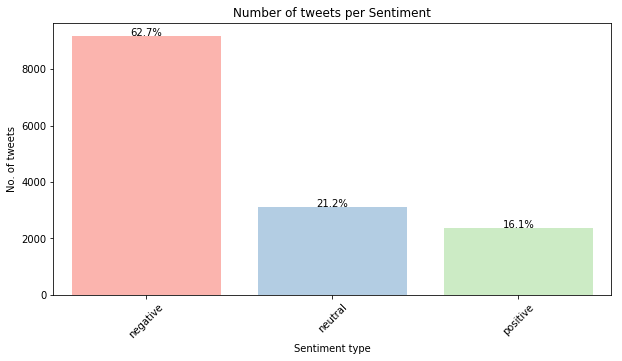

In [13]:
plt.figure(figsize=(10,5))
mycountplot_univariate('airline_sentiment', 
                       df_tweet, 
                       'Sentiment type', 
                       'No. of tweets', 
                       order=['negative','neutral','positive'])

plt.title("Number of tweets per Sentiment")
None

The majoriry of Tweets have negative sentiment (>60%). Such distribution is expected, because people when making comments rather criticize (when everything is ok, they tend not to comment at all). Neutral and positive Tweets groups equal to around 20% of dataset observations each.
It might be harder to achieve good scores on Positive and Neutral Tweets as they are underrepresented (imbalanced classification problem).
Sampling, weighting or using other score metrics than accuracy might improve the quality of the prediction.

## Number of tweets per Airline

In [14]:
df_tweet['airline'].value_counts(dropna=False)

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [15]:
df_tweet['airline'].value_counts(dropna=False,normalize=True)

United            0.261066
US Airways        0.198975
American          0.188456
Southwest         0.165301
Delta             0.151776
Virgin America    0.034426
Name: airline, dtype: float64

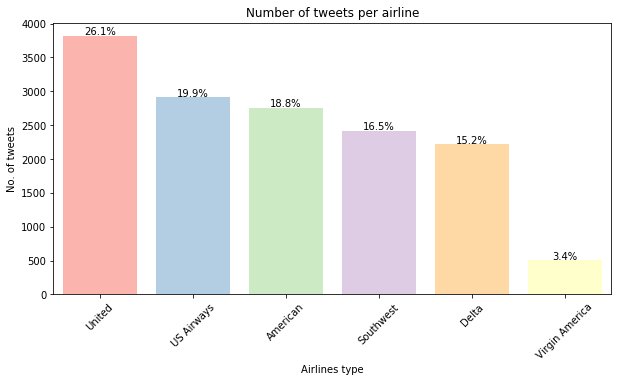

In [16]:
plt.figure(figsize=(10,5))
mycountplot_univariate('airline', 
                       df_tweet, 
                       'Airlines type', 
                       'No. of tweets', 
                       order=df_tweet['airline'].value_counts().index)

plt.title("Number of tweets per airline")
None

The distribution of Tweets per Airline is rather uniform, apart from the Virgin America which covers only 3.4% of Tweets in the dataset.

## Number of tweets per Airline and Sentiment type

In [17]:
# Absolute number of tweets per Airline and Sentiment type
pd.crosstab(df_tweet["airline"], df_tweet["airline_sentiment"])

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [18]:
# Share of Sentiment type within Airline type
pd.crosstab(df_tweet["airline"], df_tweet["airline_sentiment"]).apply(lambda x: round(x / x.sum() * 100,2), axis=1)

airline_sentiment,negative,neutral,positive
airline,,,
American,71.04,16.78,12.18
Delta,42.98,32.54,24.48
Southwest,49.01,27.44,23.55
US Airways,77.69,13.08,9.23
United,68.89,18.24,12.87
Virgin America,35.91,33.93,30.16


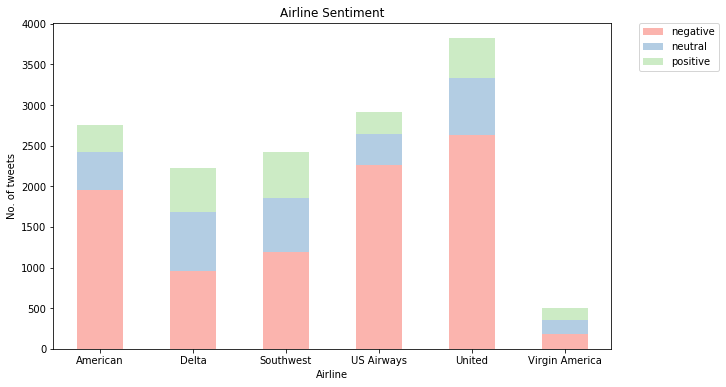

In [19]:
# Absolute values
pd.crosstab(index = df_tweet["airline"],columns = df_tweet["airline_sentiment"]).plot(kind='bar',
                                                                                      color=colors,
                                                                                      figsize=(10, 6),
                                                                                      rot=0,
                                                                                      stacked=True,
                                                                                      title="Airline Sentiment")
                                                                                                                   
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Airline')
plt.ylabel('No. of tweets', fontsize=10)

None

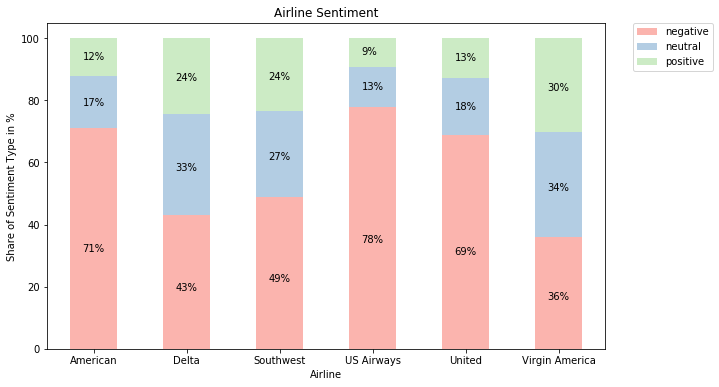

In [20]:
# Normalised values
ax = pd.crosstab(df_tweet["airline"], df_tweet["airline_sentiment"]).apply(lambda x: round(x / x.sum() * 100,2), axis=1).plot(kind='bar',
                                                                                                                    color=colors,     
                                                                                                                    figsize=(10, 6),
                                                                                                                    rot=0,
                                                                                                                    stacked=True,
                                                                                                                    title="Airline Sentiment")
  
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Airline')
plt.ylabel('Share of Sentiment Type in %')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.26*width, p.get_y()+.44*height))
None

The American, US Airways and United Airlines are relatively more negatively assessed.
Delta & Southwest are assessed relatively more positive and neutral. Virgin is the most positive assessed Airline however it represents the least number of Tweets in dataset.

## Number of tweets per Negative Reason

After checking Sentiment type per Airline, let's check what the main reason for negative comments are.

In [21]:
df_tweet['negativereason'].value_counts(dropna=False)

NaN                            5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [22]:
df_tweet['negativereason'].value_counts(dropna=False,normalize=True)

NaN                            0.373087
Customer Service Issue         0.198770
Late Flight                    0.113730
Can't Tell                     0.081284
Cancelled Flight               0.057855
Lost Luggage                   0.049454
Bad Flight                     0.039617
Flight Booking Problems        0.036134
Flight Attendant Complaints    0.032855
longlines                      0.012158
Damaged Luggage                0.005055
Name: negativereason, dtype: float64

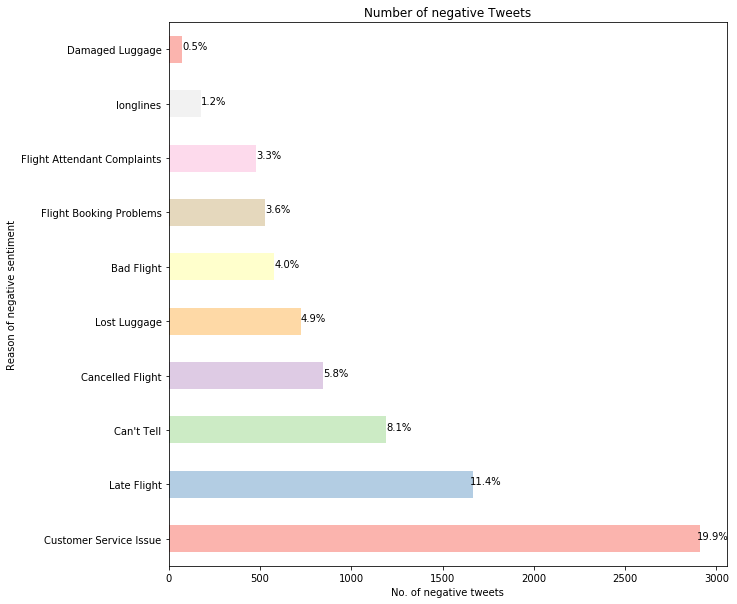

In [23]:
# Absolute values
ax = pd.Series(df_tweet['negativereason'].value_counts()).plot(kind = "barh",
                                                            color=colors,
                                                            figsize=(10,10),
                                                            fontsize=10,
                                                            rot=0,
                                                            title = "Number of negative Tweets")

total = len(df_tweet)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 70,
            p.get_y() + p.get_height()/2 ,
            '{:.1%}'.format(width/total),
            ha="center") 

plt.xlabel('No. of negative tweets', fontsize=10)
plt.ylabel('Reason of negative sentiment', fontsize=10)
None

Customer Service Issue and Late Flight are the most common reasons for negative sentiment
whereas Long Lines and Damaged Luggage are the least common reasons for negative sentiment.

In the wordcloud section I will generate the wordcloud of words for each negative reason to see if there are any specific words characteristic for these reasons types. The conclusions will not be used in classification, however it will give me some kind of feeling which words impact which negative reason.

## Number of tweets per Airline and Negative reason 

Let's have a look first at the reasons of negative twits in split of airlines.

In [24]:
pd.crosstab(df_tweet["airline"], df_tweet["negativereason"])

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


In [25]:
pd.crosstab(df_tweet["airline"], df_tweet["negativereason"]).apply(lambda x: round(x / x.sum() * 100,2), axis=1)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,4.44,10.10,12.55,39.18,0.61,4.44,6.63,12.70,7.60,1.73
Delta,6.70,19.48,5.34,20.84,1.15,6.28,4.61,28.17,5.97,1.47
Southwest,7.59,13.41,13.66,32.97,1.18,3.20,5.14,12.82,7.59,2.45
US Airways,4.60,10.87,8.35,35.84,0.49,5.44,5.39,20.02,6.81,2.21
United,8.20,14.39,6.87,25.86,0.84,6.38,5.47,19.94,10.22,1.82
Virgin America,10.50,12.15,9.94,33.15,2.21,2.76,15.47,9.39,2.76,1.66


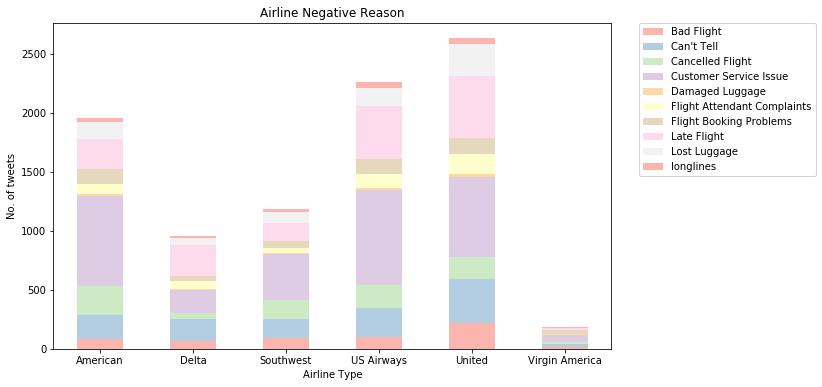

In [26]:
# Absolute values
pd.crosstab(index = df_tweet["airline"],columns = df_tweet["negativereason"]).plot(kind='bar',
                                                                                      color=colors,
                                                                                      figsize=(10, 6),
                                                                                      rot=0,
                                                                                      stacked=True,
                                                                                      title="Airline Negative Reason")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Airline Type', fontsize=10)
plt.ylabel('No. of tweets', fontsize=10)
None

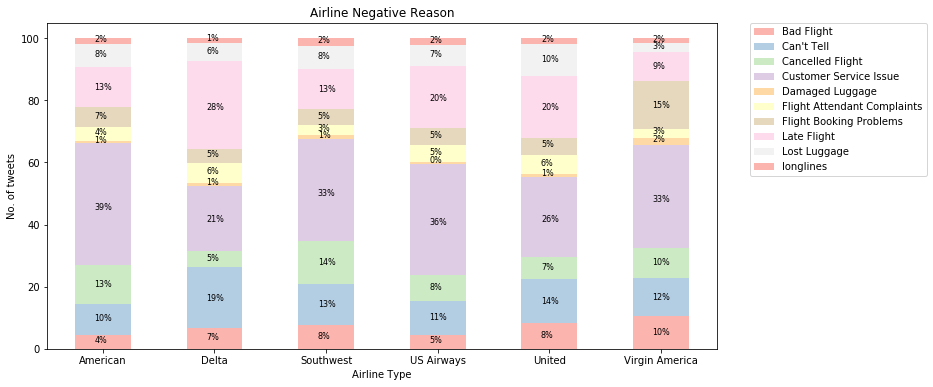

In [27]:
ax = pd.crosstab(df_tweet["airline"], df_tweet["negativereason"]).apply(lambda x: round(x / x.sum() * 100,2), axis=1).plot(kind='bar',
                                                                                                                 color=colors,
                                                                                                                 figsize=(12, 6),
                                                                                                                 rot=0,
                                                                                                                 stacked=True,
                                                                                                                 title="Airline Negative Reason")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Airline Type', fontsize=10)
plt.ylabel('No. of tweets', fontsize=10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.35*width, p.get_y()+.45*height), size=8)
None

Delta is the Airline with relatively highest complaints about flight being late, however their flights are relatively rarely cancelled.
Passengers of Delta are also relatively the most mysterious not providing the reason of negative comment.
American Airlines on the other hand has relatively higher problems with Customer Service which is the biggest issue for each company (apart from Delta).
Virgin America has the most negative comments about their Booking System, which together with the small number of Tweets might indicate they were young Airline as of 2015.

## Airline sentiment confidence

In this section I will check how cofident sentiment types are based on the sentiment score.

In [28]:
len(df_tweet["airline_sentiment_confidence"].unique())

1023

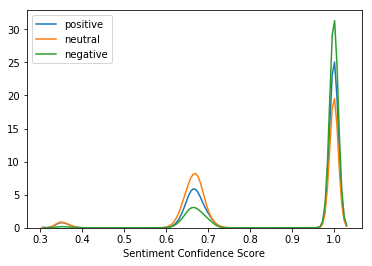

In [29]:
# Distribution plots (based on kde)
sns.kdeplot(df_tweet[df_tweet.airline_sentiment == "positive"]['airline_sentiment_confidence'],label='positive', bw=0.01)
sns.kdeplot(df_tweet[df_tweet.airline_sentiment == "neutral"]['airline_sentiment_confidence'],label='neutral',bw=0.01)
sns.kdeplot(df_tweet[df_tweet.airline_sentiment == "negative"]['airline_sentiment_confidence'],label='negative', bw=0.01)
plt.xlabel('Sentiment Confidence Score')
None

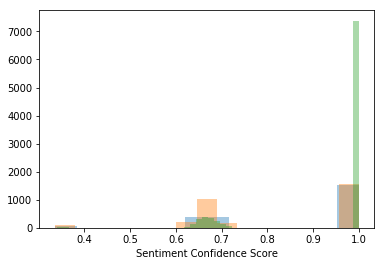

In [30]:
# Histograms
sns.distplot(df_tweet[df_tweet.airline_sentiment == "positive"]['airline_sentiment_confidence'],label='positive', kde=False)
sns.distplot(df_tweet[df_tweet.airline_sentiment == "neutral"]['airline_sentiment_confidence'],label='neutral', kde=False)
sns.distplot(df_tweet[df_tweet.airline_sentiment == "negative"]['airline_sentiment_confidence'],label='negative', kde=False)
plt.xlabel('Sentiment Confidence Score')
None

The sentiment confidence score is grouped in 3 buckets.
I do the binning and group the values into 3 bins in newly created categorical variable

In [31]:
custom_bucket_array = np.linspace(0.2, 1, 4)
print(f'Bucket cutpoints: {np.around(custom_bucket_array,2).tolist()}')
df_tweet['airline_sentiment_confidence_buckets'] = pd.cut(df_tweet['airline_sentiment_confidence'], custom_bucket_array, labels=["weak", "medium", "strong"])

Bucket cutpoints: [0.2, 0.47, 0.73, 1.0]


In [32]:
df_tweet['airline_sentiment_confidence_buckets'].head()

0    strong
1      weak
2    medium
3    strong
4    strong
Name: airline_sentiment_confidence_buckets, dtype: category
Categories (3, object): [weak < medium < strong]

In [33]:
pd.crosstab(df_tweet["airline_sentiment_confidence_buckets"], df_tweet["airline_sentiment"])

airline_sentiment,negative,neutral,positive
airline_sentiment_confidence_buckets,,,
weak,63,102,71
medium,1721,1447,775
strong,7394,1550,1517


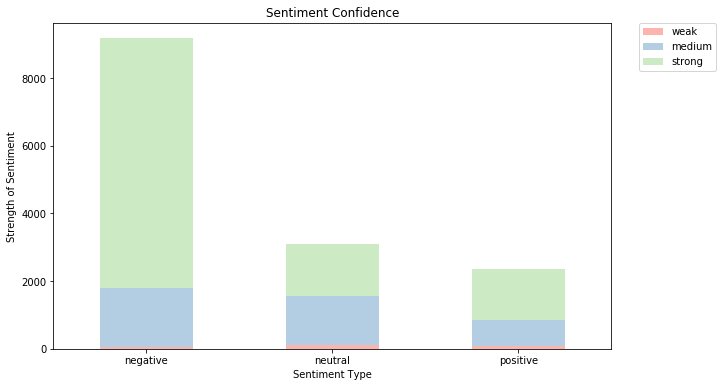

In [34]:
pd.crosstab(index = df_tweet["airline_sentiment"],columns = df_tweet["airline_sentiment_confidence_buckets"]).plot(kind='bar',
                                                                                                                   color=colors,
                                                                                                                   figsize=(10, 6),
                                                                                                                   rot=0,
                                                                                                                   stacked=True,
                                                                                                                   title="Sentiment Confidence")
plt.xlabel('Sentiment Type')
plt.ylabel('Strength of Sentiment')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None

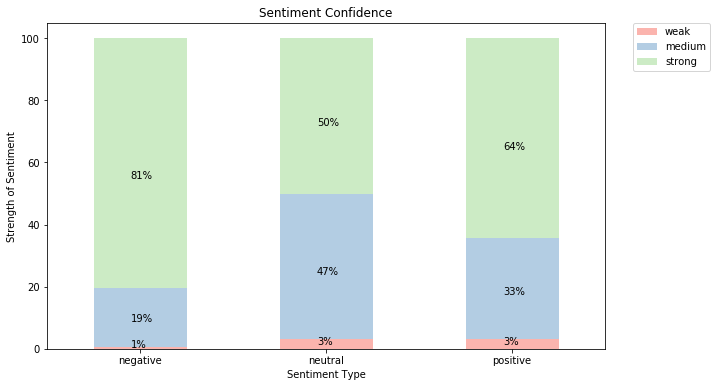

In [35]:
ax = pd.crosstab(index = df_tweet["airline_sentiment"],columns = df_tweet["airline_sentiment_confidence_buckets"]).apply(lambda x: round(x / x.sum() * 100,2), axis=1).plot(kind='bar',
                                                                                                                                                                      color=colors,
                                                                                                                                                                      figsize=(10, 6),
                                                                                                                                                                      rot=0,
                                                                                                                                                                      stacked=True,
                                                                                                                                                                      title="Sentiment Confidence")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Sentiment Type')
plt.ylabel('Strength of Sentiment')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.4*width, p.get_y()+.44*height))
None

Negative sentiment type is not only the most common but is also defined with relatively strongest confidence.
Moreover it might difficult to predict neutral class, because it is not frequent and it is built halfly by medium strong words.

## Wordclouds

Below I will present the wordclouds based on twitter texts.
For this purpose I will clean the text of tweets. 
This cleaned text will also be used for modelling. 
While cleaning text for wordcloud presentation seems reasonable, you may think whether it is a good idea to clean the twitter text for modelling.
I am aware that due to old-school NLP data cleansing techniques like lowering the case or lemmatization I might lose some piece of information. If someone is capitalising word in tweet it might express user emotions.
Nevertheless I follow the cleansing of the twitter text in two ways (full and light). I use the full conservative cleansing approach to operate quicker on modelling performance and get rid of lots of junk words, this will lower my accuracy a bit. Once having the best model architecture, I will show how accuracy changes when I use less conservative light cleansing based on fast.ai tokenizer.
Summarizing, I use two cleansing functions as follows:
* clean_tweets_full - applied for wordclouds and all the models till choosing final model.
* clean_tweets_light - applied for best model and checking the improvement of accuracy.

*Cleansing steps (full) - conservative:*
* remove the owner of the twit
* remove stock market tickers like $GE
* remove old style retweet text "RT"
* remove hyperlinks
* remove hashtags sign # but keep the keep the hashtag word
* remove non-alphabetical strings and punctuations (might be questionable, some strings like '...' might mean irritation for example)
* lower case
* remove stopwords
* lemmatize
* TweetTokenizer which reduces repeated characters in words like AAAAAAwesome to specified number
* removes emojis which might have significant effect on sentiment

*Cleansing steps (light):*
* remove the owner of the twit
* remove hyperlinks
* rest is done by Fast.ai tokenizer


In [36]:
# function which allows to recognize the part of speech and perform lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [37]:
# function which allows to clean the tweet text 
lemmatizer = WordNetLemmatizer()
  
def clean_tweets_full(tweet):
    
    tweet = re.sub(r'@[A-Za-z0-9]+','', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    # at first I did not remove non-alphabetical characters and I had huge junk of non-meaningful words which slowed calculation of models.
    # therefore I decided to keep alphanumeric chars only. 
    # Then removing non-alpha chars caused removal @ signs in front of the twitter user and the 'strip handles' argument below could not recognize the user name.
    # Therefore I explicitly remove user at the beginning of a script
        
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, # lower() function for tweets
                               strip_handles=True, # it removes user (altghouh I remove it already at first line of function)
                               reduce_len=True) # reduce repeated chars inside words
    
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            lem_word = lemmatizer.lemmatize(word,get_wordnet_pos(word)) # lemmatize
            tweets_clean.append(lem_word)
 
    return tweets_clean
 

In [38]:
df_tweet['cleaned_text_tokenized']=df_tweet['text'].apply(lambda x: clean_tweets_full(x))
df_tweet['cleaned_text_joined']=df_tweet['cleaned_text_tokenized'].apply(lambda x: ' '.join(map(str, x)))
cleaned_text_joined_all = ' '.join(df_tweet['cleaned_text_joined'])

In [39]:
pd.set_option('display.max_colwidth', -1)
df_tweet.head(20)[['airline_sentiment','text','cleaned_text_tokenized','cleaned_text_joined']]

,airline_sentiment,text,cleaned_text_tokenized,cleaned_text_joined
0,neutral,@VirginAmerica What @dhepburn said.,[say],say
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"[plus, add, commercial, experience, tacky]",plus add commercial experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"[today, must, mean, need, take, another, trip]",today must mean need take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]",really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,"[really, big, bad, thing]",really big bad thing
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,"[seriously, would, pay, flight, seat, play, really, bad, thing, fly, va]",seriously would pay flight seat play really bad thing fly va
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","[yes, nearly, every, time, fly, vx, ear, worm, go, away]",yes nearly every time fly vx ear worm go away
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","[really, miss, prime, opportunity, men, without, hat, parody]",really miss prime opportunity men without hat parody
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",[well],well
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","[amaze, arrive, hour, early, good]",amaze arrive hour early good


### Whole dataset

First, let's analyse the words from whole dataset.

In [40]:
fdist_all = nltk.FreqDist([word for word in cleaned_text_joined_all.split()])
for word, frequency in fdist_all.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_all.values())*100,2)}%)')

flight: 4873 (3.85%)
get: 2087 (1.65%)
hour: 1169 (0.92%)
thanks: 1080 (0.85%)
cancel: 1065 (0.84%)
u: 1044 (0.82%)
service: 1003 (0.79%)
time: 973 (0.77%)
help: 957 (0.76%)
customer: 941 (0.74%)
call: 791 (0.62%)
bag: 770 (0.61%)
go: 767 (0.61%)
wait: 754 (0.6%)
plane: 733 (0.58%)
fly: 701 (0.55%)
make: 695 (0.55%)
need: 688 (0.54%)
hold: 685 (0.54%)
amp: 680 (0.54%)


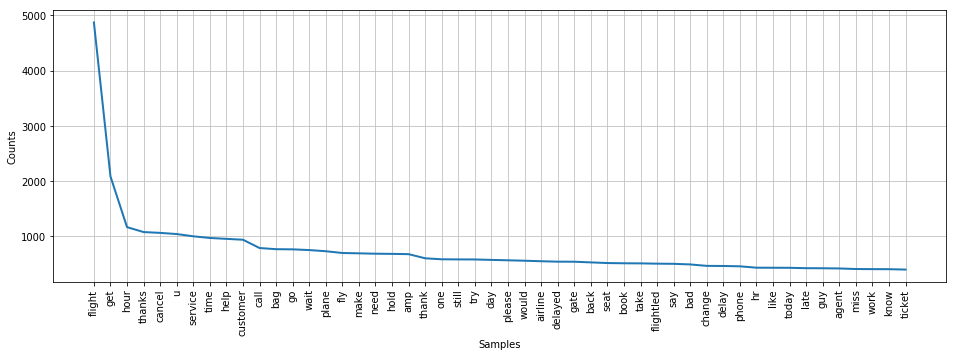

In [41]:
plt.figure(figsize=(16,5))
fdist_all.plot(50)

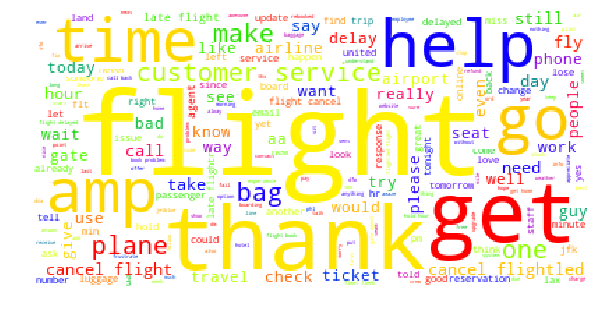

In [42]:
wordcloud = WordCloud(stopwords='',
                      background_color='white',
                      colormap='prism'
                      #relative_scaling=1.0,
                     ).generate(cleaned_text_joined_all)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most common words are: 
* flight: (3.85%)
* get: (1.65%)
* hour: (0.92%)
* thanks: (0.85%)
* cancel: (0.84%)

### Neutral sentiment words

Having seen the vocabulary on the whole data set, I think that distribution of words for neutral sentiment will look similar. 

In [43]:
df_tweet_neutral= df_tweet[df_tweet['airline_sentiment']=='neutral']
cleaned_text_joined_all_neutral = ' '.join(df_tweet_neutral['cleaned_text_joined'])

In [44]:
#10 neutral twitters sample
df_tweet_neutral.text.sample(10)

12228    @AmericanAir um. down south has snow too #ATL                                                                                        
7620     @JetBlue hi is there a way we can check to track the flight that will arrive &amp; that will be our flight to depart.                
1922     @united Flight 1547 CMH to ORD just arrived at gate. Next segment to YVR already boarding. Will they hold it?                        
11184    @USAirways if you've got room on an earlier flight home, why charge me $75 to get on it? Be the hero!                                
12590    @AmericanAir Oh trust me. I am in love. It is so beautiful!                                                                          
27       @VirginAmerica do you miss me? Don't worry we'll be together very soon.                                                              
7374     @JetBlue I think I have it selected already ☺️                                                                                       

In [45]:
# distribution of words for neutral sentiment
fdist_neutral = nltk.FreqDist([word for word in cleaned_text_joined_all_neutral.split()])
for word, frequency in fdist_neutral.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_neutral.values())*100,2)}%)')

flight: 807 (3.78%)
get: 341 (1.6%)
need: 185 (0.87%)
please: 181 (0.85%)
help: 174 (0.81%)
fly: 157 (0.74%)
thanks: 155 (0.73%)
u: 147 (0.69%)
go: 143 (0.67%)
dm: 133 (0.62%)
book: 126 (0.59%)
would: 123 (0.58%)
ticket: 116 (0.54%)
change: 113 (0.53%)
time: 111 (0.52%)
tomorrow: 109 (0.51%)
fleek: 106 (0.5%)
know: 105 (0.49%)
fleet: 103 (0.48%)
cancel: 101 (0.47%)


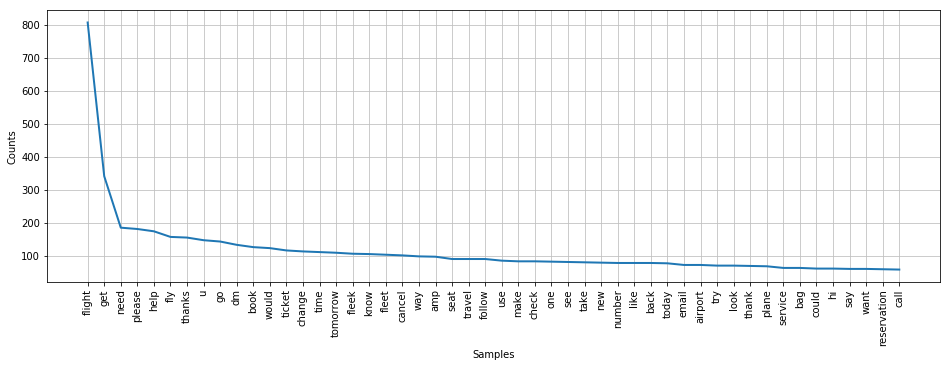

In [46]:
plt.figure(figsize=(16,5))
fdist_neutral.plot(50)

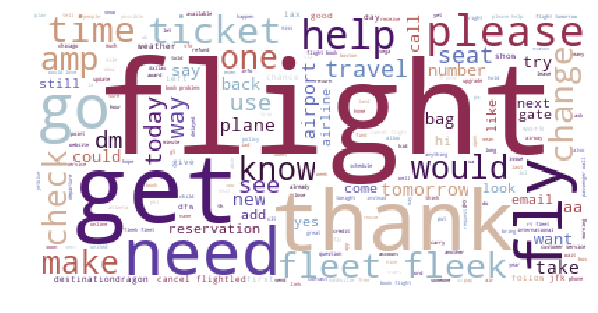

In [47]:
# wordcloud for neutral sentiment
wordcloud = WordCloud(stopwords='',
                      background_color='white',
                      colormap='twilight',
                      #relative_scaling=1,
                     ).generate(cleaned_text_joined_all_neutral)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most common neutral words are: 
* flight: (3.78%)
* get: (1.6%)
* need: (0.87%)
* please: (0.85%)
* help: (0.81%)

Some of the "negatively associated" words disappeared (like _cancel, customer, service_) from most common words in neutral sentiment. 
Looking at the most common words like _get, need, please, help_ as well at the examples of neutral tweets, I suspect that neutral sentiment appears when people ask for something or would like to clarify something with the airline.

### Negative sentiment words

Now let's have a closer look at negative sentiment words.

#### Negative sentiment words

In [48]:
df_tweet_negative = df_tweet[df_tweet['airline_sentiment']=='negative']
cleaned_text_joined_all_negative = ' '.join(df_tweet_negative['cleaned_text_joined'])

In [49]:
#10 negative twitters sample
df_tweet_negative.text.sample(10)

6389     @SouthwestAir this was the 3rd Cancelled Flightlation in 2 days due to weather in Nashville. 3 trips to the airport. Each time communicated Late Flight by SW
10346    @USAirways My wife, sick 3yr-old-twins, and I have been waiting in line now for 2hrs to see an agent! Phone agent said nothing til Tuesday!                  
7928     @JetBlue flight 348 is a freaking nightmare tonight #sittingonthetarmac #delay                                                                               
7478     @JetBlue When I got your alert, I immediately started looking to rebook. But we only had 11 minutes from reFlight Booking Problems to catch a flight to SRQ. 
838      @united was no one between the scan and inside the plane. I just asked the people in line around me where the plane was going                                
11917    @AmericanAir submitted a case to AA customer relations two weeks ago, no word ever since! whats the point of even having CR?                                

In [50]:
# distribution of words for negative sentiment
fdist_negative = nltk.FreqDist([word for word in cleaned_text_joined_all_negative.split()])
for word, frequency in fdist_negative.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_negative.values())*100,2)}%)')

flight: 3617 (4.09%)
get: 1494 (1.69%)
hour: 1115 (1.26%)
cancel: 926 (1.05%)
customer: 782 (0.88%)
service: 776 (0.88%)
u: 760 (0.86%)
time: 752 (0.85%)
call: 700 (0.79%)
wait: 670 (0.76%)
help: 667 (0.75%)
bag: 664 (0.75%)
hold: 652 (0.74%)
plane: 600 (0.68%)
go: 545 (0.62%)
delayed: 507 (0.57%)
amp: 501 (0.57%)
still: 493 (0.56%)
try: 484 (0.55%)
need: 479 (0.54%)


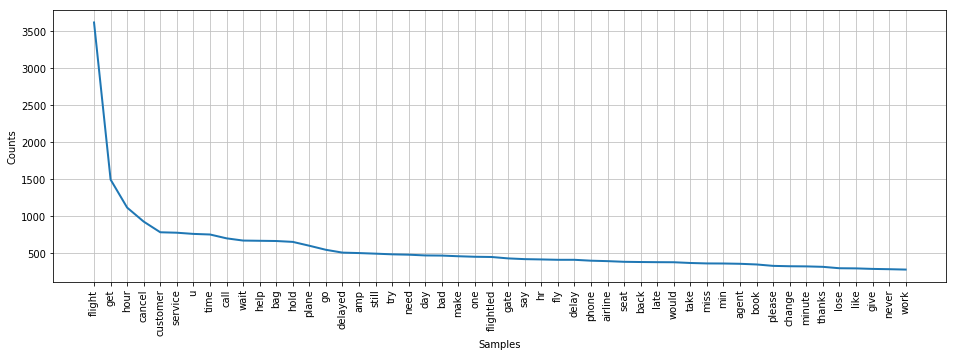

In [51]:
plt.figure(figsize=(16,5))
fdist_negative.plot(50)

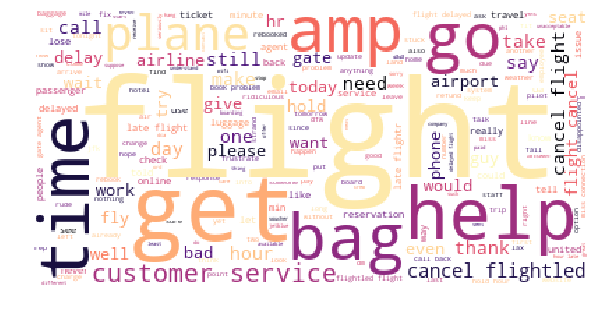

In [52]:
wordcloud = WordCloud(stopwords='',
                      background_color='white',
                      colormap='magma',
                     ).generate(cleaned_text_joined_all_negative)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most common negative words are: 
flight: (4.09%)
get: (1.69%)
hour: (1.26%)
cancel: (1.05%)
customer: (0.88%).
Words like _hour, cancel, customer_ did not appear frequently in neutral sentiment tweets.

Looking just at most common words, we cannot make much conclusions.
Some of the words will appear in all tweets, irrespectively of sentiment (like flight for example).
What would be interesting is to see which words increased their relative frequency in negative tweets in comparison to neutral tweets.
Therefore, let's compare neutral versus negative sentiment words.

#### Negative sentiment words versus neutral sentiment words

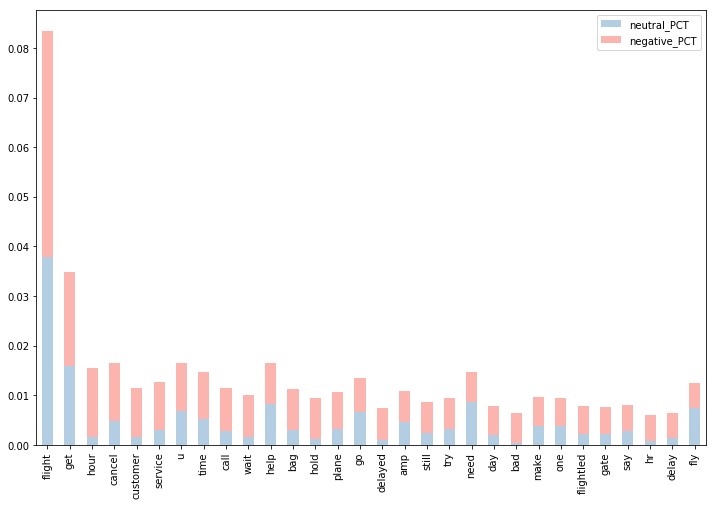

In [53]:
# top 30 negative words and their share in negative and neutral sentiment tweets

combined = {key:[fdist_neutral[key], fdist_negative[key]] for key in fdist_neutral}
combined_PD=pd.DataFrame(combined).T
combined_PD.columns = ['neutral','negative']
combined_PD['neutral_PCT']=combined_PD['neutral']/combined_PD['neutral'].sum()
combined_PD['negative_PCT']=combined_PD['negative']/combined_PD['negative'].sum()
combined_PD['PCT_diff']=combined_PD['negative_PCT']-combined_PD['neutral_PCT']
combined_PD['PCT_diff%']=combined_PD['negative_PCT']/combined_PD['neutral_PCT']-1
combined_PD=combined_PD.sort_values('negative_PCT', ascending=False)
combined_PD[['neutral_PCT','negative_PCT']].head(30).plot(kind='bar',
                                                          figsize=(12,8),
                                                          stacked=True, 
                                                          color=[colors[1],colors[0]]
                                                          )
None

When red bar dominates the blue bar it means that word relatively more often occurs in negative context rather than in neutral context.
(examples: _hour, customer, bag, hold_).
When blue bar dominates the red bar it means that word relatively more often occurs in neutral context rather than negative (examples: _help, need, fly_).

In [54]:
#top 10 negative words which share increase most by percentage points in comparison to neutral sentiment
combined_PD.sort_values('PCT_diff', ascending=False).head(10)

,neutral,negative,neutral_PCT,negative_PCT,PCT_diff,PCT_diff%
hour,32,1115,0.001499,0.014076,0.012578,8.392870
customer,35,782,0.001639,0.009872,0.008233,5.022990
flight,807,3617,0.037793,0.045663,0.007870,0.208227
hold,24,652,0.001124,0.008231,0.007107,6.323349
cancel,101,926,0.004730,0.011690,0.006960,1.471514
wait,34,670,0.001592,0.008458,0.006866,4.312137
service,63,776,0.002950,0.009797,0.006846,2.320432
call,58,700,0.002716,0.008837,0.006121,2.253445
bag,63,664,0.002950,0.008383,0.005432,1.841194
bad,10,467,0.000468,0.005896,0.005427,11.588972


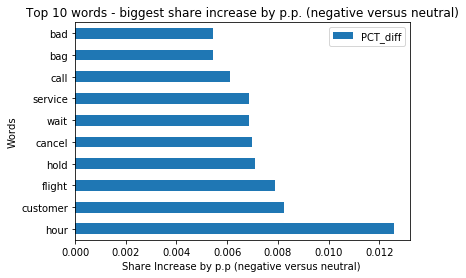

In [55]:
combined_PD=combined_PD.sort_values('PCT_diff', ascending=False)
combined_PD[['PCT_diff']].head(10).plot(kind='barh', title='Top 10 words - biggest share increase by p.p. (negative versus neutral)')
plt.xlabel('Share Increase by p.p (negative versus neutral) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

The words which increased their share most (by percentage points) in negative versus neutral tweets are:
_hour, customer, flight and hold_.
Instead of looking at frequency increase by percentage points, let's check the increase by percentage.

In [56]:
#top 10 negative words which share increase most by percentage in comparison to neutral sentiment
combined_PD.sort_values('PCT_diff%', ascending=False).head(10)

,neutral,negative,neutral_PCT,negative_PCT,PCT_diff,PCT_diff%
half,1,71,0.000047,0.000896,0.000850,18.139551
three,1,66,0.000047,0.000833,0.000786,16.791696
helpful,1,62,0.000047,0.000783,0.000736,15.713411
lack,1,60,0.000047,0.000757,0.000711,15.174269
frustrate,2,117,0.000094,0.001477,0.001383,14.769912
apology,1,57,0.000047,0.000720,0.000673,14.365555
handle,1,56,0.000047,0.000707,0.000660,14.095984
disconnect,1,54,0.000047,0.000682,0.000635,13.556842
suck,2,106,0.000094,0.001338,0.001245,13.287271
load,1,52,0.000047,0.000656,0.000610,13.017700


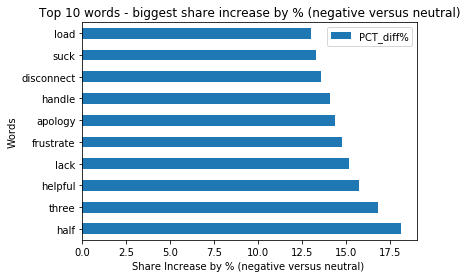

In [57]:
combined_PD=combined_PD.sort_values('PCT_diff%', ascending=False)
combined_PD[['PCT_diff%']].head(10).plot(kind='barh',title='Top 10 words - biggest share increase by % (negative versus neutral)')
plt.xlabel('Share Increase by % (negative versus neutral) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

The words which increased their share most (by percentage) in negative versus neutral tweets are the words which almost did not exist in neutral tweets (e.g. disappointed) but appeared relatively more frequently in negative tweets, these are: _half, three, helpful, lack, frustrate_

Let's have a look at distribution of negative words in split of confidence bucket.

#### Negative sentiment words in split of confidence bucket

Let's check which words are most frequent in strongly and medium negative tweets.
There are too few weak negative tweets to analyse their vocabulary.

In [58]:
df_tweet_negative_medium = df_tweet[(df_tweet['airline_sentiment']=='negative') & (df_tweet["airline_sentiment_confidence_buckets"]=='medium')]
cleaned_text_joined_all_negative_medium = ' '.join(df_tweet_negative_medium['cleaned_text_joined'])
df_tweet_negative_strong = df_tweet[(df_tweet['airline_sentiment']=='negative') & (df_tweet["airline_sentiment_confidence_buckets"]=='strong')]
cleaned_text_joined_all_negative_strong= ' '.join(df_tweet_negative_strong['cleaned_text_joined'])

In [59]:
# distribution of words for strong vs. medium negative sentiment
print('medium negative sentiment:')
fdist_medium = nltk.FreqDist([word for word in cleaned_text_joined_all_negative_medium.split()])
for word, frequency in fdist_medium.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_medium.values())*100,2)}%)')
print()
print('strong negative sentiment:')
fdist_strong = nltk.FreqDist([word for word in cleaned_text_joined_all_negative_strong.split()])
for word, frequency in fdist_strong.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_strong.values())*100,2)}%)')


medium negative sentiment:
flight: 592 (3.96%)
get: 264 (1.76%)
help: 155 (1.04%)
u: 128 (0.86%)
cancel: 122 (0.82%)
need: 109 (0.73%)
go: 101 (0.67%)
make: 101 (0.67%)
time: 94 (0.63%)
book: 92 (0.61%)
say: 92 (0.61%)
would: 91 (0.61%)
please: 87 (0.58%)
bag: 87 (0.58%)
call: 85 (0.57%)
try: 84 (0.56%)
hour: 82 (0.55%)
one: 80 (0.53%)
plane: 80 (0.53%)
fly: 79 (0.53%)

strong negative sentiment:
flight: 3018 (4.14%)
get: 1223 (1.68%)
hour: 1032 (1.42%)
cancel: 803 (1.1%)
service: 711 (0.97%)
customer: 709 (0.97%)
time: 655 (0.9%)
u: 625 (0.86%)
call: 615 (0.84%)
wait: 607 (0.83%)
hold: 604 (0.83%)
bag: 575 (0.79%)
plane: 516 (0.71%)
help: 508 (0.7%)
delayed: 452 (0.62%)
go: 442 (0.61%)
amp: 440 (0.6%)
bad: 431 (0.59%)
still: 426 (0.58%)
day: 413 (0.57%)


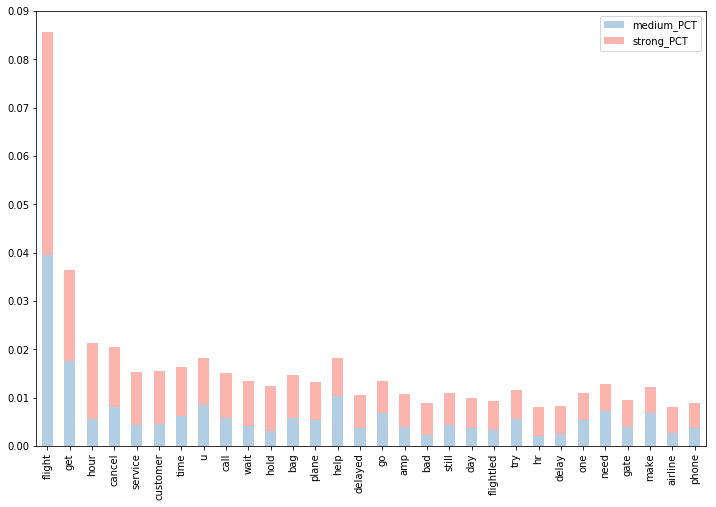

In [60]:
# top 30 strong negative words and their share in strong and medium negative sentiment tweets
combined = {key:[fdist_medium[key], fdist_strong[key]] for key in fdist_medium}
combined_PD=pd.DataFrame(combined).T
combined_PD.columns = ['medium','strong']
combined_PD['medium_PCT']=combined_PD['medium']/combined_PD['medium'].sum()
combined_PD['strong_PCT']=combined_PD['strong']/combined_PD['strong'].sum()
combined_PD['PCT_diff']=combined_PD['strong_PCT']-combined_PD['medium_PCT']
combined_PD['PCT_diff%']=combined_PD['strong_PCT']/combined_PD['medium_PCT']-1
combined_PD=combined_PD.sort_values('strong_PCT', ascending=False)
combined_PD[['medium_PCT','strong_PCT']].head(30).plot(kind='bar',
                                                       figsize=(12,8),
                                                       stacked=True,
                                                       color=[colors[1],colors[0]])
None

The medium negative words distribution is getting closer to neutral words distribution.

In [61]:
#top 10 strong negative words which share increase most by percentage points in comparison to medium negative words
combined_PD.sort_values('PCT_diff', ascending=False)[:10]

,medium,strong,medium_PCT,strong_PCT,PCT_diff,PCT_diff%
hour,82,1032,0.005480,0.015768,0.010288,1.877380
flight,592,3018,0.039562,0.046111,0.006549,0.165545
service,65,711,0.004344,0.010863,0.006519,1.500850
customer,69,709,0.004611,0.010833,0.006221,1.349246
hold,47,604,0.003141,0.009228,0.006087,1.938127
wait,62,607,0.004143,0.009274,0.005131,1.238352
bad,33,431,0.002205,0.006585,0.004380,1.986034
cancel,122,803,0.008153,0.012269,0.004116,0.504829
time,94,655,0.006282,0.010007,0.003726,0.593107
call,85,615,0.005680,0.009396,0.003716,0.654198


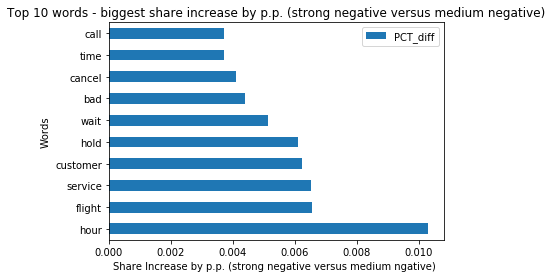

In [62]:
combined_PD=combined_PD.sort_values('PCT_diff', ascending=False)
combined_PD[['PCT_diff']].head(10).plot(kind='barh',title='Top 10 words - biggest share increase by p.p. (strong negative versus medium negative)')
plt.xlabel('Share Increase by p.p. (strong negative versus medium ngative) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

In [63]:
#top 10 strong negative words which share increase most by % in comparison to medium negative words
combined_PD.sort_values('PCT_diff%', ascending=False)[:10]

,medium,strong,medium_PCT,strong_PCT,PCT_diff,PCT_diff%
disappointed,1,96,0.000067,0.001467,0.001400,20.948389
horrible,1,77,0.000067,0.001176,0.001110,16.604437
lack,1,59,0.000067,0.000901,0.000835,12.489114
disconnect,1,53,0.000067,0.000810,0.000743,11.117340
human,1,51,0.000067,0.000779,0.000712,10.660082
terrible,2,98,0.000134,0.001497,0.001364,10.202823
ridiculous,2,88,0.000134,0.001345,0.001211,9.059678
poor,2,80,0.000134,0.001222,0.001089,8.145162
counter,1,38,0.000067,0.000581,0.000514,7.687904
unitedairlines,1,36,0.000067,0.000550,0.000483,7.230646


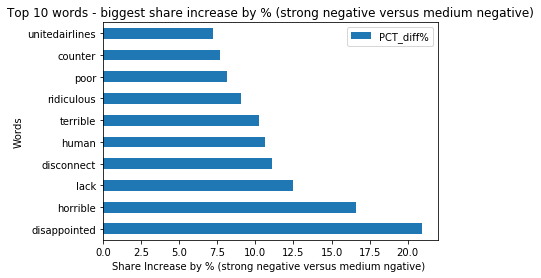

In [64]:
combined_PD=combined_PD.sort_values('PCT_diff%', ascending=False)
combined_PD[['PCT_diff%']].head(10).plot(kind='barh',title='Top 10 words - biggest share increase by % (strong negative versus medium negative)')
plt.xlabel('Share Increase by % (strong negative versus medium ngative) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

Looking at the above-mentioned words, we see that they are strongly associated with negative meaning and negative emotions (e.g. _disappointed or terrible_), so it seems reasonable that their share increased a lot in strong-negative tweets.

#### Negative sentiment words in split of negative reason

Here I check the words distribution for negative tweets in split of negative reason.

In [65]:
df_tweet_negative.negativereason.unique().tolist()

['Bad Flight',
 "Can't Tell",
 'Late Flight',
 'Customer Service Issue',
 'Flight Booking Problems',
 'Lost Luggage',
 'Flight Attendant Complaints',
 'Cancelled Flight',
 'Damaged Luggage',
 'longlines']

In [66]:
# Dictionary containing dataframes filtered by negative reason
d={}
for i in df_tweet_negative.negativereason.unique().tolist():
    d["df_tweet_negative_{0}".format(i)]=df_tweet[(df_tweet['negativereason']==i)]

In [67]:
# Shape of Negative reason frames
for key in list(d.keys()):
    print(key, d[key].shape)

df_tweet_negative_Bad Flight (580, 18)
df_tweet_negative_Can't Tell (1190, 18)
df_tweet_negative_Late Flight (1665, 18)
df_tweet_negative_Customer Service Issue (2910, 18)
df_tweet_negative_Flight Booking Problems (529, 18)
df_tweet_negative_Lost Luggage (724, 18)
df_tweet_negative_Flight Attendant Complaints (481, 18)
df_tweet_negative_Cancelled Flight (847, 18)
df_tweet_negative_Damaged Luggage (74, 18)
df_tweet_negative_longlines (178, 18)


In [68]:
# Top 10 most freqeuny negative words in split of negative sentiment reason
for key in list(d.keys()):
    cleaned_text_joined_all_negative_reason = ' '.join(d[key]['cleaned_text_joined'])
    fdist_negative_reason= nltk.FreqDist([word for word in cleaned_text_joined_all_negative_reason.split()])
    print(key)
    for word, frequency in fdist_negative_reason.most_common(10):
        print(f'{word}: {frequency} ({round(frequency/sum(fdist_negative_reason.values())*100,2)}%)')
    print()

df_tweet_negative_Bad Flight
flight: 244 (4.17%)
seat: 133 (2.27%)
plane: 128 (2.19%)
get: 72 (1.23%)
wifi: 66 (1.13%)
u: 47 (0.8%)
time: 39 (0.67%)
work: 37 (0.63%)
bad: 36 (0.62%)
fly: 34 (0.58%)

df_tweet_negative_Can't Tell
flight: 164 (1.76%)
get: 127 (1.36%)
airline: 118 (1.27%)
fly: 100 (1.07%)
bad: 92 (0.99%)
u: 87 (0.93%)
go: 70 (0.75%)
time: 66 (0.71%)
make: 64 (0.69%)
never: 61 (0.66%)

df_tweet_negative_Late Flight
flight: 931 (5.67%)
hour: 435 (2.65%)
delayed: 419 (2.55%)
delay: 326 (1.99%)
get: 287 (1.75%)
plane: 260 (1.58%)
time: 216 (1.32%)
wait: 214 (1.3%)
late: 190 (1.16%)
u: 163 (0.99%)

df_tweet_negative_Customer Service Issue
flight: 640 (2.3%)
customer: 594 (2.14%)
service: 586 (2.11%)
call: 512 (1.84%)
get: 511 (1.84%)
hold: 494 (1.78%)
hour: 405 (1.46%)
phone: 309 (1.11%)
help: 305 (1.1%)
try: 257 (0.92%)

df_tweet_negative_Flight Booking Problems
flight: 239 (4.48%)
book: 150 (2.81%)
get: 104 (1.95%)
try: 83 (1.56%)
help: 65 (1.22%)
ticket: 65 (1.22%)
change: 5

df_tweet_negative_Bad Flight


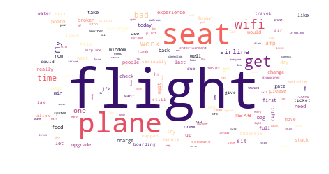

df_tweet_negative_Can't Tell


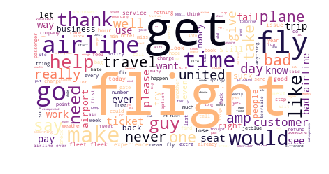

df_tweet_negative_Late Flight


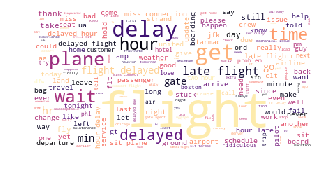

df_tweet_negative_Customer Service Issue


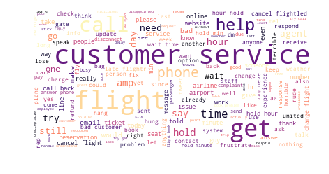

df_tweet_negative_Flight Booking Problems


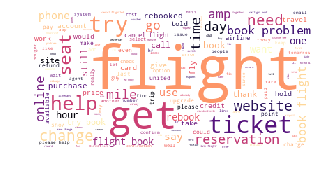

df_tweet_negative_Lost Luggage


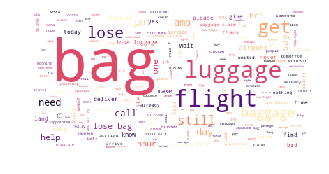

df_tweet_negative_Flight Attendant Complaints


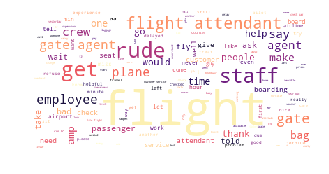

df_tweet_negative_Cancelled Flight


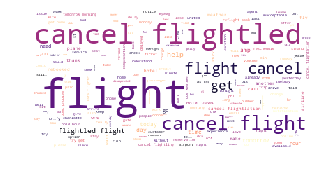

df_tweet_negative_Damaged Luggage


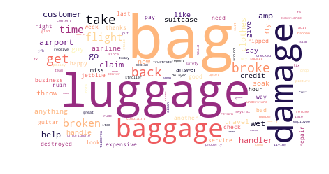

df_tweet_negative_longlines


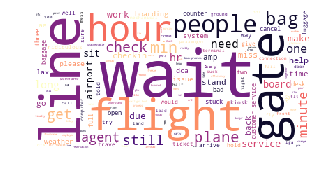

In [69]:
#  Wordclouds for negative sentiment reason
for key in list(d.keys()):
    cleaned_text_joined_all_negative_reason = ' '.join(d[key]['cleaned_text_joined'])
    print(key)
    wordcloud = WordCloud(stopwords='',
                      background_color='white',
                      relative_scaling=1,
                      colormap='magma',
                     ).generate(cleaned_text_joined_all_negative_reason)
    plt.figure(1,figsize=(5, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Both looking at distributions and wordclouds we can see that characteristic words for the following reasons are as follows:
* 'Bad Flight' - _flight, seat, plane, wifi_ ,
* "Can't Tell" - here the distirbution of words is quite uniform,
* 'Late Flight' - _flight, plane, hour, delay, wait_,
* 'Customer Service Issue' - _flight, customer, service, call_ ,
* 'Flight Booking Problems' - _flight, get, ticket, try_ ,
* 'Lost Luggage' - _bag, flight, luggage_ ,
* 'Flight Attendant Complaints' - _flight, staff, rude, attendant_ ,
* 'Cancelled Flight' - _flight, cancel, flightled_ ,
* 'Damaged Luggage' - _bag, luggage, damage_ ,
* 'longlines' - _line, wait, gate, people_ 

### Positive sentiment words

#### Positive sentiment words

Now let's have a closer look at positive sentiment words.

In [70]:
df_tweet_positive = df_tweet[df_tweet['airline_sentiment']=='positive']
cleaned_text_joined_all_positive = ' '.join(df_tweet_positive['cleaned_text_joined'])

In [71]:
#10 positive twitters sample
df_tweet_positive.text.sample(10)

6874    @JetBlue Happy Anniversary!! It's hard to believe you're 15!! You're so young!                                                              
9222    @USAirways no worries, your flight attendant took care of it.                                                                               
8133    @JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend's wedding #greatservice
1793    @united Thanks so much , my passport was recovered                                                                                          
4511    @SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!! 
7787    @JetBlue good to hear. Thx for being responsive.                                                                                            
5510    @SouthwestAir I wish i would've seen this 4 hours ago!!! I WANTED TO SEE THEM TONIGHT SO BAD!!!! #

In [72]:
# distribution of words for positive sentiment
fdist_positive = nltk.FreqDist([word for word in cleaned_text_joined_all_positive.split()])
for word, frequency in fdist_positive.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_positive.values())*100,2)}%)')

thanks: 610 (3.62%)
thank: 455 (2.7%)
flight: 449 (2.66%)
get: 252 (1.5%)
great: 237 (1.41%)
service: 164 (0.97%)
make: 154 (0.91%)
love: 150 (0.89%)
u: 137 (0.81%)
fly: 134 (0.8%)
customer: 124 (0.74%)
guy: 122 (0.72%)
help: 116 (0.69%)
time: 110 (0.65%)
good: 110 (0.65%)
much: 109 (0.65%)
airline: 106 (0.63%)
best: 105 (0.62%)
awesome: 100 (0.59%)
work: 85 (0.5%)


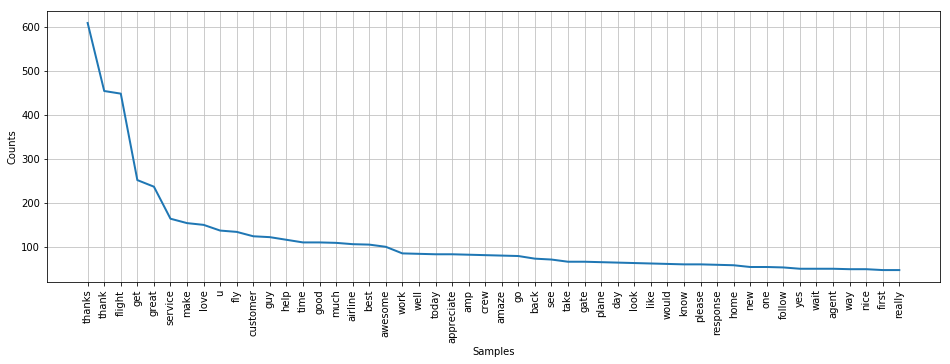

In [73]:
plt.figure(figsize=(16,5))
fdist_positive.plot(50)

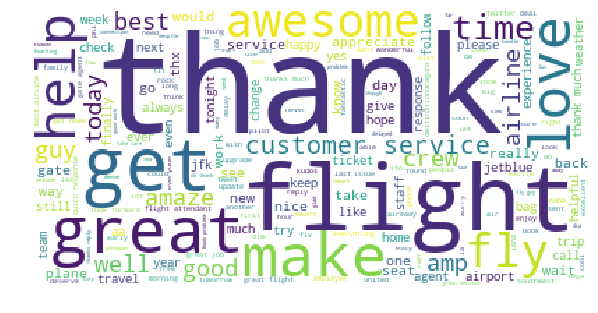

In [74]:
wordcloud = WordCloud(stopwords='',
                      background_color='white',
                      colormap='viridis'
                     ).generate(cleaned_text_joined_all_positive)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most common positive words are: 
thanks: (3.62%)
thank: (2.7%)
flight: (2.66%)
get: (1.5%)
great: (1.41%)

#### Postive sentiment words versus neutral sentiment words

Similarly is I did for negative words.
Let's compare the share of positive versus neutral words to see which determines the positive sentiment.

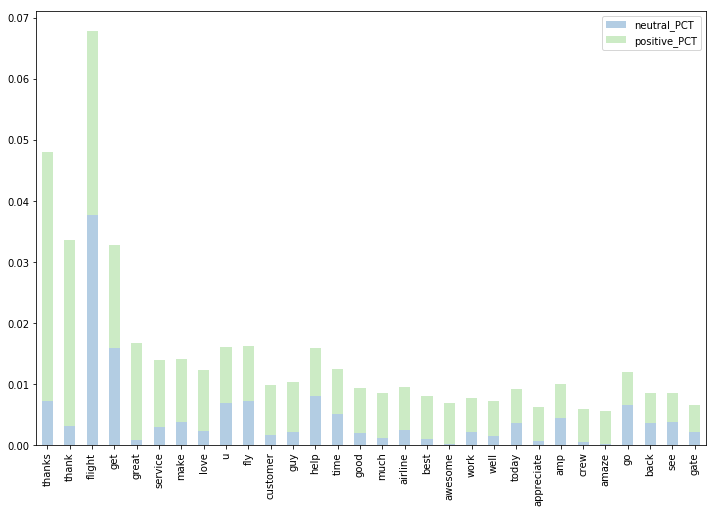

In [75]:
# top 20 positive words and their share in positive and neutral sentiment tweets
combined = {key:[fdist_neutral[key], fdist_positive[key]] for key in fdist_neutral}
combined_PD=pd.DataFrame(combined).T
combined_PD.columns = ['neutral','positive']
combined_PD['neutral_PCT']=combined_PD['neutral']/combined_PD['neutral'].sum()
combined_PD['positive_PCT']=combined_PD['positive']/combined_PD['positive'].sum()
combined_PD['PCT_diff']=combined_PD['positive_PCT']-combined_PD['neutral_PCT']
combined_PD['PCT_diff%']=combined_PD['positive_PCT']/combined_PD['neutral_PCT']-1
combined_PD=combined_PD.sort_values('positive_PCT', ascending=False)
combined_PD[['neutral_PCT','positive_PCT']].head(30).plot(kind='bar',
                                                          figsize=(12,8),
                                                          stacked=True, 
                                                          color=[colors[1],colors[2]]
                                                          )
None

There are words which are typical for positive sentiment: _thank, thanks, great, love_. 
We can see also that there are words like: _flight, get, fly_ that are frequent both in positive and neutral sentiment.

In [76]:
#top 10 positive words which share increased most by percentage points in comparison to neutral sentiment
combined_PD.sort_values('PCT_diff', ascending=False).head(10)

,neutral,positive,neutral_PCT,positive_PCT,PCT_diff,PCT_diff%
thanks,155,610,0.007259,0.040868,0.033609,4.630067
thank,69,455,0.003231,0.030484,0.027252,8.433607
great,20,237,0.000937,0.015878,0.014942,15.952502
service,63,164,0.002950,0.010988,0.008037,2.724078
love,50,150,0.002342,0.010050,0.007708,3.291773
customer,35,124,0.001639,0.008308,0.006669,4.068379
make,83,154,0.003887,0.010318,0.006431,1.654349
awesome,6,100,0.000281,0.006700,0.006419,22.843182
much,26,109,0.001218,0.007303,0.006085,4.997477
best,23,105,0.001077,0.007035,0.005958,5.530959


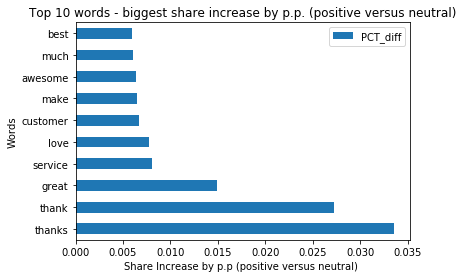

In [77]:
combined_PD=combined_PD.sort_values('PCT_diff', ascending=False)
combined_PD[['PCT_diff']].head(10).plot(kind='barh', title='Top 10 words - biggest share increase by p.p. (positive versus neutral)')
plt.xlabel('Share Increase by p.p (positive versus neutral) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

In [78]:
#top 10 positive words which share increased most by % in comparison to neutral sentiment
combined_PD.sort_values('PCT_diff%', ascending=False).head(10)

,neutral,positive,neutral_PCT,positive_PCT,PCT_diff,PCT_diff%
helpful,1,40,0.000047,0.002680,0.002633,56.223637
kudos,1,26,0.000047,0.001742,0.001695,36.195364
wonderful,1,24,0.000047,0.001608,0.001561,33.334182
awesome,6,100,0.000281,0.006700,0.006419,22.843182
handle,1,16,0.000047,0.001072,0.001025,21.889455
despite,1,15,0.000047,0.001005,0.000958,20.458864
amaze,6,80,0.000281,0.005360,0.005079,18.074546
raise,1,12,0.000047,0.000804,0.000757,16.167091
safely,1,12,0.000047,0.000804,0.000757,16.167091
great,20,237,0.000937,0.015878,0.014942,15.952502


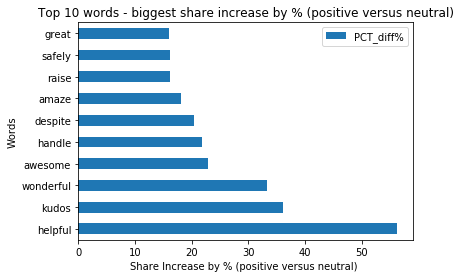

In [79]:
combined_PD=combined_PD.sort_values('PCT_diff%', ascending=False)
combined_PD[['PCT_diff%']].head(10).plot(kind='barh', title='Top 10 words - biggest share increase by % (positive versus neutral)')
plt.xlabel('Share Increase by % (positive versus neutral) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

Words like _thanks, thank, best_ etc. appear much more frequently in positive tweets than in neutral tweets (although they exist in neutral tweets as well).
However there are some words like _helpful, kudos, wonderful, awesome_ which almost did not appear in neutral tweets, but became quite frequent in positive ones.

#### Positive sentiment words in split of confidence bucket

Let's check which words are most frequent in strongly and medium positive tweets.
There are too few weak positve tweets to analyse their vocabulary.

In [80]:
df_tweet_positive_medium = df_tweet[(df_tweet['airline_sentiment']=='positive') & (df_tweet["airline_sentiment_confidence_buckets"]=='medium')]
cleaned_text_joined_all_positive_medium = ' '.join(df_tweet_positive_medium['cleaned_text_joined'])
df_tweet_positive_strong = df_tweet[(df_tweet['airline_sentiment']=='positive') & (df_tweet["airline_sentiment_confidence_buckets"]=='strong')]
cleaned_text_joined_all_positive_strong= ' '.join(df_tweet_positive_strong['cleaned_text_joined'])

In [81]:
# distribution of words for strong vs. medium positive sentiment
print('medium positive sentiment:')
fdist_medium = nltk.FreqDist([word for word in cleaned_text_joined_all_positive_medium.split()])
for word, frequency in fdist_medium.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_medium.values())*100,2)}%)')
print()
print('strong positive sentiment:')
fdist_strong = nltk.FreqDist([word for word in cleaned_text_joined_all_positive_strong.split()])
for word, frequency in fdist_strong.most_common(20):
    print(f'{word}: {frequency} ({round(frequency/sum(fdist_strong.values())*100,2)}%)')


medium positive sentiment:
thanks: 187 (3.45%)
flight: 135 (2.49%)
thank: 103 (1.9%)
get: 99 (1.82%)
make: 42 (0.77%)
great: 39 (0.72%)
u: 38 (0.7%)
fly: 35 (0.65%)
help: 35 (0.65%)
love: 34 (0.63%)
time: 32 (0.59%)
well: 31 (0.57%)
look: 29 (0.53%)
would: 28 (0.52%)
amp: 28 (0.52%)
like: 27 (0.5%)
back: 26 (0.48%)
plane: 26 (0.48%)
please: 26 (0.48%)
go: 25 (0.46%)

strong positive sentiment:
thanks: 410 (3.76%)
thank: 346 (3.18%)
flight: 306 (2.81%)
great: 198 (1.82%)
get: 143 (1.31%)
service: 138 (1.27%)
love: 115 (1.06%)
make: 107 (0.98%)
customer: 101 (0.93%)
guy: 97 (0.89%)
fly: 94 (0.86%)
best: 93 (0.85%)
u: 93 (0.85%)
much: 87 (0.8%)
awesome: 84 (0.77%)
good: 83 (0.76%)
airline: 77 (0.71%)
help: 76 (0.7%)
time: 74 (0.68%)
amaze: 69 (0.63%)


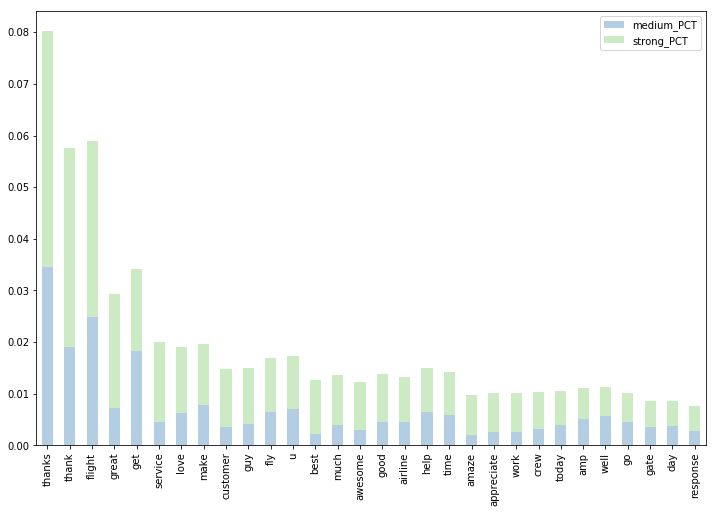

In [82]:
# top 30 strong positive words and their share in strong and medium positive sentiment tweets
combined = {key:[fdist_medium[key], fdist_strong[key]] for key in fdist_medium}
combined_PD=pd.DataFrame(combined).T
combined_PD.columns = ['medium','strong']
combined_PD['medium_PCT']=combined_PD['medium']/combined_PD['medium'].sum()
combined_PD['strong_PCT']=combined_PD['strong']/combined_PD['strong'].sum()
combined_PD['PCT_diff']=combined_PD['strong_PCT']-combined_PD['medium_PCT']
combined_PD['PCT_diff%']=combined_PD['strong_PCT']/combined_PD['medium_PCT']-1
combined_PD=combined_PD.sort_values('strong_PCT', ascending=False)
combined_PD[['medium_PCT','strong_PCT']].head(30).plot(kind='bar',
                                                       stacked=True,
                                                       figsize=(12,8),
                                                       color=[colors[1],colors[2]])
None

In [83]:
#top 10 strong positve words which share increase most by percentage points in comparison to medium positive words
combined_PD.sort_values('PCT_diff', ascending=False)[:10]

,medium,strong,medium_PCT,strong_PCT,PCT_diff,PCT_diff%
thank,103,346,0.018986,0.038586,0.019600,1.032317
great,39,198,0.007189,0.022081,0.014892,2.071519
thanks,187,410,0.034470,0.045723,0.011253,0.326462
service,25,138,0.004608,0.015390,0.010781,2.339578
flight,135,306,0.024885,0.034125,0.009240,0.371324
best,12,93,0.002212,0.010371,0.008159,3.688720
customer,19,101,0.003502,0.011264,0.007761,2.216032
guy,23,97,0.004240,0.010817,0.006578,1.551505
love,34,115,0.006267,0.012825,0.006558,1.046310
awesome,16,84,0.002949,0.009368,0.006418,2.176230


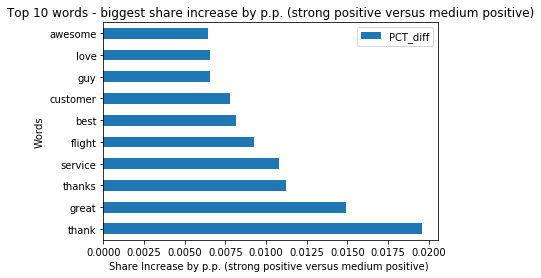

In [84]:
combined_PD=combined_PD.sort_values('PCT_diff', ascending=False)
combined_PD[['PCT_diff']].head(10).plot(kind='barh',title='Top 10 words - biggest share increase by p.p. (strong positive versus medium positive)')
plt.xlabel('Share Increase by p.p. (strong positive versus medium positive) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

In [85]:
combined_PD.sort_values('PCT_diff%', ascending=False)[:10]

,medium,strong,medium_PCT,strong_PCT,PCT_diff,PCT_diff%
fantastic,1,17,0.000184,0.001896,0.001712,9.284934
despite,1,14,0.000184,0.001561,0.001377,7.469945
newark,1,14,0.000184,0.001561,0.001377,7.469945
sw,1,13,0.000184,0.001450,0.001265,6.864949
ride,1,10,0.000184,0.001115,0.000931,5.049961
lovely,1,10,0.000184,0.001115,0.000931,5.049961
outstanding,1,10,0.000184,0.001115,0.000931,5.049961
employee,2,18,0.000369,0.002007,0.001639,4.444965
flyfi,1,9,0.000184,0.001004,0.000819,4.444965
pretty,1,9,0.000184,0.001004,0.000819,4.444965


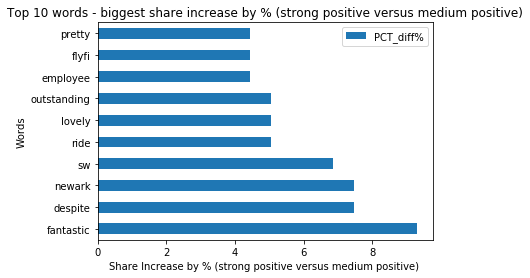

In [86]:
#top 10 strong positive words which share increase most by % in comparison to medium positive words
combined_PD=combined_PD.sort_values('PCT_diff%', ascending=False)
combined_PD[['PCT_diff%']].head(10).plot(kind='barh',title='Top 10 words - biggest share increase by % (strong positive versus medium positive)')
plt.xlabel('Share Increase by % (strong positive versus medium positive) ', fontsize=10)
plt.ylabel('Words', fontsize=10)
None

Such words like _thanks, great, thank, love_ occur more frequently in strong-positive tweets in comparison to medium-positive tweets, however they are frequent in both groups.

## Sentiment score (frequency based)

Last thing in my EDA is to determine which words are indicating more positive, neutral or more negative sentiment. I partly did it via distributions of words and wordclouds in previous sections. Here I want to create a simple metric based on frequencies which will quantify whether a word is more postive, neutral or negative associated. This metric is based on frequencies per sentiment type and word popularity in order to avoid situation that some words are e.g. negatively associated but they exist only in a few tweets, their generalization power is quite low.

I will try to create the scatter plot which on Y-axis will show 1 kind of sentiment score (e.g. positive)
and on the X-axis will show the 2 kind of sentiment score (e.g. negative). The words high in Y and low in X might be considered as positive words.

In [87]:
#let's create freq table using dictionaries created before
freq = {key: (fdist_negative.get(key), fdist_neutral.get(key), fdist_positive.get(key))
          for key in fdist_negative.keys() | fdist_neutral.keys() | fdist_positive.keys()}

In [88]:
result=pd.DataFrame.from_dict(freq).fillna(0).T
result.columns=['negative','neutral','positive']
result=result.sort_values(by='negative', ascending=False)
result.iloc[:10]

,negative,neutral,positive
flight,3617.0,807.0,449.0
get,1494.0,341.0,252.0
hour,1115.0,32.0,22.0
cancel,926.0,101.0,38.0
customer,782.0,35.0,124.0
service,776.0,63.0,164.0
u,760.0,147.0,137.0
time,752.0,111.0,110.0
call,700.0,58.0,33.0
wait,670.0,34.0,50.0


I select one sentiment (e.g. negative) and create two metrics:
* Sentiment type share, which shows in which type of sentiment particular word is most frequent.
    * e.g. negative ratio for word _flight_: 3617/(3617+807+449) = 0,74%
* Popularity in particular class, which shows whether particular word contributes to sentiment by chance or exist quite frequently.
    * e.g. negative ratio for word _flight_: 3617/(sum in negative column) = 0,04%

In [89]:
result['neg_ratio1'] = result['negative'] / result.values.sum(axis=1)
result['neg_ratio2'] = result['negative'] / result.negative.sum()

In [90]:
result.head(5)

,negative,neutral,positive,neg_ratio1,neg_ratio2
flight,3617.0,807.0,449.0,0.742253,0.040920
get,1494.0,341.0,252.0,0.715860,0.016902
hour,1115.0,32.0,22.0,0.953807,0.012614
cancel,926.0,101.0,38.0,0.869484,0.010476
customer,782.0,35.0,124.0,0.831031,0.008847


Now I would like to multiple ratio1 and ratio2.

mean: 0.6278043343304787
min: 0.0
max: 1.0


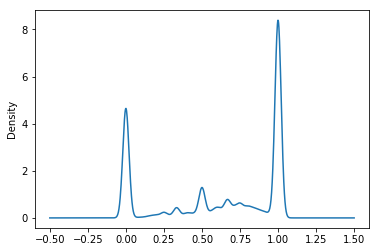

In [91]:
result['neg_ratio1'].plot.kde(bw_method=0.05)
print('mean:',np.mean(result['neg_ratio1']))
print('min:',np.min(result['neg_ratio1']))
print('max:',np.max(result['neg_ratio1']))
None

mean: 0.00010927767457106882
min: 0.0
max: 0.0409195298270225


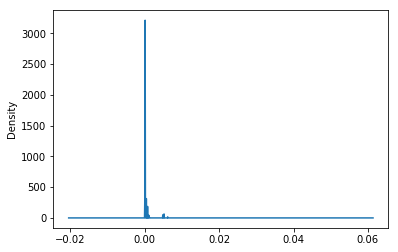

In [92]:
result['neg_ratio2'].plot.kde(bw_method=0.001)
print('mean:',np.mean(result['neg_ratio2']))
print('min:',np.min(result['neg_ratio2']))
print('max:',np.max(result['neg_ratio2']))
None

It is hard to multiply these two ratios. If we multiply ratio 1 by ratio2 we will have numbers close to 0.
I want two ratios to be between 0-1. 
Quite useful can be to standarization of ratio 2 column using z-scores (substract mean and divide by standard deviation).
Then mean values will have 0 and positive outliers will go on positive scale.
After standardizing the values I then call CDF function to convert values form 0 to 1.

In [93]:
result['neg_ratio2_zscore'] = result['neg_ratio2'].to_frame().apply(zscore, ddof=1)
result['neg_ratio1_zscore'] = result['neg_ratio1'].to_frame().apply(zscore, ddof=1)
result['neg_ratio1_zscore_CDF'] = result['neg_ratio1_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))
result['neg_ratio2_zscore_CDF'] = result['neg_ratio2_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))

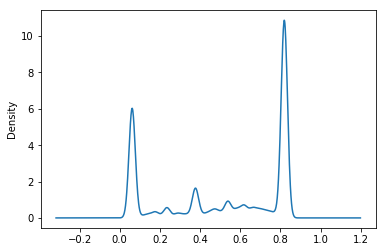

In [94]:
result['neg_ratio1_zscore_CDF'].plot.kde(bw_method=0.05)
None

The chart for ratio 1 is more less the same as it reached the values between 0-1 already.

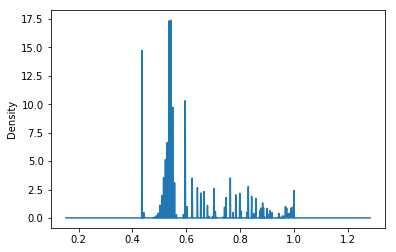

In [95]:
result['neg_ratio2_zscore_CDF'].plot.kde(bw_method=0.001)
None

The ratio2 normalized by CD (zscore). Mean (0.00001) reaches now 0.5, positive outliers are around 1
and 0 values have peak <0.5. I think this measure might be useful to some extent.
I sqeeuzed the values between far outliers and mean frequency.
For me if the word has z-score equals around 10 (outlier far far in terms of sigma from mean) or 20 (even further form mean) I want both of them to have value close to 1.

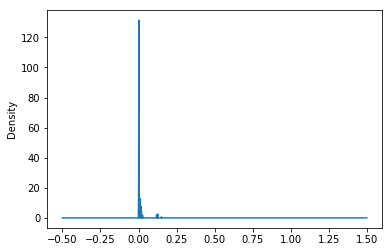

In [96]:
pd.Series(minmax_scale(result['neg_ratio2'])).plot.kde(bw_method=0.001)
None

Min max normalization scaled the values between 0 and 1, but kept the original distances between values. I will not use this way of data normalization.

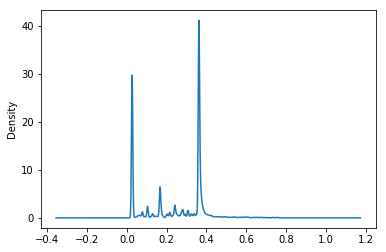

In [97]:
result['neg_score']=result['neg_ratio1_zscore_CDF']*result['neg_ratio2_zscore_CDF']
result['neg_score'].plot.kde(bw_method=0.02)
None

In [98]:
# top 10 words by negative score
result.sort_values(by='neg_score', ascending=False).head(10)

,negative,neutral,positive,neg_ratio1,neg_ratio2,neg_ratio2_zscore,neg_ratio1_zscore,neg_ratio1_zscore_CDF,neg_ratio2_zscore_CDF,neg_score
rude,134.0,3.0,0.0,0.978102,0.001516,2.105851,0.859079,0.804852,0.982391,0.790679
hr,415.0,15.0,5.0,0.954023,0.004695,6.864909,0.800027,0.788152,1.000000,0.788152
hour,1115.0,32.0,22.0,0.953807,0.012614,18.720213,0.799496,0.787999,1.000000,0.787999
fail,129.0,3.0,0.0,0.977273,0.001459,2.021170,0.857045,0.804290,0.978369,0.786892
hold,652.0,24.0,9.0,0.951825,0.007376,10.878776,0.794636,0.786587,1.000000,0.786587
bad,467.0,10.0,17.0,0.945344,0.005283,7.745589,0.778742,0.781934,1.000000,0.781934
min,360.0,13.0,12.0,0.935065,0.004073,5.933421,0.753533,0.774435,1.000000,0.774435
luggage,247.0,12.0,6.0,0.932075,0.002794,4.019636,0.746202,0.772227,0.999971,0.772205
delayed,507.0,21.0,16.0,0.931985,0.005736,8.423035,0.745981,0.772161,1.000000,0.772161
stuck,160.0,9.0,3.0,0.930233,0.001810,2.546191,0.741682,0.770860,0.994555,0.766663


Looking at neg_score, the word _rude_ gains the highest score value because it is dominant in negative sentiment and quite popular, whereas word _hour_ is slightly less dominant in terms of sentiment but is more popular amongst negative words. I repeat the steps for positive and medium classes.

In [99]:
result['pos_ratio1'] = result['positive'] / result.values.sum(axis=1)
result['pos_ratio2'] = result['positive'] / result.negative.sum()
result['pos_ratio2_zscore'] = result['pos_ratio2'].to_frame().apply(zscore, ddof=1)
result['pos_ratio1_zscore'] = result['pos_ratio1'].to_frame().apply(zscore, ddof=1)
result['pos_ratio1_zscore_CDF'] = result['pos_ratio1_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))
result['pos_ratio2_zscore_CDF'] = result['pos_ratio2_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))
result['pos_score']=result['pos_ratio1_zscore_CDF']*result['pos_ratio2_zscore_CDF']

In [100]:
# top 10 words by positive score
result.sort_values(by='pos_score', ascending=False).head(10)

,negative,neutral,positive,neg_ratio1,neg_ratio2,neg_ratio2_zscore,neg_ratio1_zscore,neg_ratio1_zscore_CDF,neg_ratio2_zscore_CDF,neg_score,pos_ratio1,pos_ratio2,pos_ratio2_zscore,pos_ratio1_zscore,pos_ratio1_zscore_CDF,pos_ratio2_zscore_CDF,pos_score
awesome,18.0,6.0,100.0,0.145161,0.000204,0.141258,-1.183646,0.118277,0.556167,0.065782,0.807473,0.001131,8.010743,0.741120,0.770690,1.000000,0.770690
rock,6.0,4.0,38.0,0.125000,0.000068,-0.061976,-1.233090,0.108771,0.475291,0.051698,0.800577,0.000430,2.950914,0.736908,0.769411,0.998416,0.768192
amaze,16.0,6.0,80.0,0.156863,0.000181,0.107386,-1.154949,0.124056,0.542758,0.067332,0.785518,0.000905,6.378540,0.727709,0.766604,1.000000,0.766604
kudos,3.0,1.0,26.0,0.100000,0.000034,-0.112784,-1.294400,0.097764,0.455101,0.044492,0.887669,0.000294,1.971592,0.790107,0.785267,0.975672,0.766163
thank,81.0,69.0,455.0,0.133884,0.000916,1.208235,-1.211302,0.112890,0.886522,0.100079,0.750539,0.005147,36.982342,0.706342,0.760012,1.000000,0.760012
excellent,4.0,0.0,24.0,0.142857,0.000045,-0.095848,-1.189296,0.117162,0.461821,0.054108,0.873018,0.000272,1.808372,0.781157,0.782645,0.964726,0.755038
wonderful,4.0,1.0,24.0,0.137931,0.000045,-0.095848,-1.201377,0.114802,0.461821,0.053018,0.842981,0.000272,1.808372,0.762810,0.777212,0.964726,0.749796
great,82.0,20.0,237.0,0.241888,0.000928,1.225171,-0.946431,0.171964,0.889745,0.153004,0.695553,0.002681,19.191332,0.672754,0.749448,1.000000,0.749448
thanks,315.0,155.0,610.0,0.291667,0.003564,5.171294,-0.824352,0.204870,1.000000,0.204870,0.561667,0.006901,49.631913,0.590971,0.722730,1.000000,0.722730
love,72.0,50.0,150.0,0.264706,0.000815,1.055810,-0.890472,0.186606,0.854472,0.159450,0.548183,0.001697,12.091250,0.582734,0.719964,1.000000,0.719964


In [101]:
result['neu_ratio1'] = result['neutral'] / result.values.sum(axis=1)
result['neu_ratio2'] = result['neutral'] / result.negative.sum()
result['neu_ratio2_zscore'] = result['neu_ratio2'].to_frame().apply(zscore, ddof=1)
result['neu_ratio1_zscore'] = result['neu_ratio1'].to_frame().apply(zscore, ddof=1)
result['neu_ratio1_zscore_CDF'] = result['neu_ratio1_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))
result['neu_ratio2_zscore_CDF'] = result['neu_ratio2_zscore'].to_frame().apply(lambda x:st.norm.cdf(x))
result['neu_score']=result['neu_ratio1_zscore_CDF']*result['neu_ratio2_zscore_CDF']

In [102]:
# top 10 words by neutral score
result.sort_values(by='neu_score', ascending=False).head(10)

,negative,neutral,positive,neg_ratio1,neg_ratio2,neg_ratio2_zscore,neg_ratio1_zscore,neg_ratio1_zscore_CDF,neg_ratio2_zscore_CDF,neg_score,...,pos_ratio1_zscore_CDF,pos_ratio2_zscore_CDF,pos_score,neu_ratio1,neu_ratio2,neu_ratio2_zscore,neu_ratio1_zscore,neu_ratio1_zscore_CDF,neu_ratio2_zscore_CDF,neu_score
ceo,11.0,37.0,2.0,0.220000,0.000124,0.022705,-1.000109,0.158629,0.509057,0.080751,...,0.607312,0.505166,0.306793,0.715173,0.000419,2.728062,2.005021,0.977520,0.996815,0.974406
fleek,30.0,106.0,14.0,0.200000,0.000339,0.344492,-1.049158,0.147053,0.634762,0.093343,...,0.619723,0.839467,0.520237,0.689473,0.001199,8.157965,1.911815,0.972050,1.000000,0.972050
fleet,33.0,103.0,16.0,0.217105,0.000373,0.395300,-1.007208,0.156917,0.653689,0.102575,...,0.622465,0.876055,0.545314,0.659685,0.001165,7.921882,1.803781,0.964367,1.000000,0.964367
wall,5.0,26.0,1.0,0.156250,0.000057,-0.078912,-1.156451,0.123748,0.468551,0.057982,...,0.605354,0.472630,0.286108,0.783946,0.000294,1.862425,2.254440,0.987916,0.968728,0.957022
hi,26.0,61.0,9.0,0.270833,0.000294,0.276747,-0.875444,0.190666,0.609013,0.116118,...,0.619740,0.720464,0.446501,0.613946,0.000690,4.616724,1.637899,0.949279,0.999998,0.949277
destinationdragons,11.0,51.0,21.0,0.132530,0.000124,0.022705,-1.214623,0.112255,0.509057,0.057144,...,0.656579,0.941037,0.617865,0.585831,0.000577,3.829781,1.535934,0.937723,0.999936,0.937663
rt,25.0,52.0,12.0,0.280899,0.000283,0.259811,-0.850759,0.197452,0.602495,0.118964,...,0.629180,0.796462,0.501118,0.560172,0.000588,3.908475,1.442873,0.925472,0.999954,0.925429
avgeek,0.0,19.0,2.0,0.000000,0.000000,-0.163593,-1.539643,0.061824,0.435026,0.026895,...,0.621536,0.505166,0.313979,0.876198,0.000215,1.311565,2.589016,0.995187,0.905167,0.900810
street,2.0,19.0,1.0,0.090909,0.000023,-0.129720,-1.316695,0.093970,0.448394,0.042136,...,0.608978,0.472630,0.287821,0.831380,0.000215,1.311565,2.426474,0.992377,0.905167,0.898266
march,6.0,20.0,2.0,0.214286,0.000068,-0.061976,-1.014123,0.155262,0.475291,0.073795,...,0.614765,0.505166,0.310558,0.674544,0.000226,1.390259,1.857671,0.968392,0.917775,0.888766


In [103]:
result['pos_neg_score']=result.pos_score*result.neg_score

In [104]:
def plot_scatter(x,y,adjust=False):

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(x, y, c=(x*y) , cmap=plt.get_cmap('BuPu') , alpha=0.4)
    
    texts=[]
    for i in range(10):
        texts.append([plt.text(x[result.sort_values(by=['neg_score'], ascending=[False]).head(10).index].values[i],
                     y[result.sort_values(by=['neg_score'], ascending=[False]).head(10).index].values[i], 
                     result.sort_values(by=['neg_score'], ascending=[False]).head(10).index.tolist()[i])])
    
    texts2=[]
    for k in range(10):
        texts2.append([plt.text(x[result.sort_values(by=['pos_score'], ascending=[False]).head(10).index].values[k],
                     y[result.sort_values(by=['pos_score'], ascending=[False]).head(10).index].values[k], 
                     result.sort_values(by=['pos_score'], ascending=[False]).head(10).index.tolist()[k])])
    
    texts3=[]
    for l in range(10):
        texts3.append([plt.text(x[result.sort_values(by=['pos_neg_score'], ascending=[False]).head(10).index].values[l],
                     y[result.sort_values(by=['pos_neg_score'], ascending=[False]).head(10).index].values[l], 
                     result.sort_values(by=['pos_neg_score'], ascending=[False]).head(10).index.tolist()[l])])
    
    if adjust:
        for i in texts:
                adjust_text(i, x, y,
                                  expand_points=(4, 3),
                                  arrowprops=dict(arrowstyle="->", color='red', lw=0.5)
                                  )

        for j in texts2:                 
                adjust_text(j, x, y,
                                  expand_points=(4.5, 1),
                                  arrowprops=dict(arrowstyle="->", color='green', lw=0.5)
                                  )
                         
        for a in texts3:                 
                adjust_text(a, x, y,
                                  expand_points=(4, 3),
                                  arrowprops=dict(arrowstyle="->", color='b', lw=0.5)
                                  )

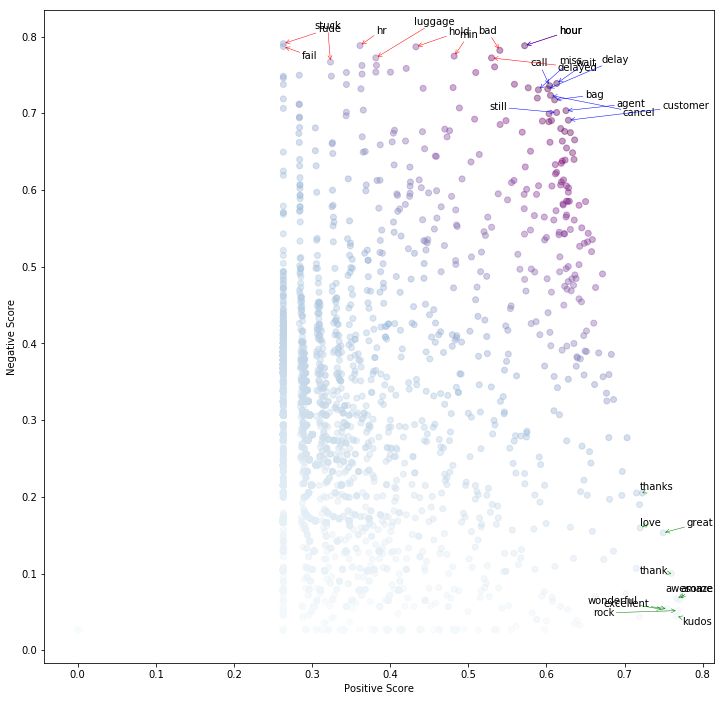

In [105]:
from adjustText import adjust_text
plot_scatter(result.pos_score,result.neg_score, adjust=True)
plt.xlabel('Positive Score', fontsize=10)
plt.ylabel('Negative Score', fontsize=10)
None

The graph indicates 3 groups of words:
* Words which have the highest positive score (right down corner - green arrow), e.g. kudos, awesome
* Words which have the highest negative score (upper part - red arrow), e.g. fail, stuck
* Words which have the highest positive and negative score (upper right - blue arrow), e.g. customer, cancel
<br> Words determined by either high positive score or high negative score should be good discriminant for our sentiment analysis.</br>
(I did not draw other sentiment combination like neutral versus positive etc.)

I did not plot other variables existing in the dataset, as I consider them as not that relevant for analysis (e.g. map with with state colors showing percentage of positive or negative sentiment could show wheter certain US states might be more "complaining" or more "happy"  in terms of being airline clients. Due to time constraint I did not go into such visualisation).

# Data preparation

Having first glance at data I will focus on data preparation now.

## Drop the columns

Having decided to use the text only, I drop the rest.

In [106]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 18 columns):
tweet_id                                14640 non-null int64
airline_sentiment                       14640 non-null object
airline_sentiment_confidence            14640 non-null float64
negativereason                          9178 non-null object
negativereason_confidence               10522 non-null float64
airline                                 14640 non-null object
airline_sentiment_gold                  40 non-null object
name                                    14640 non-null object
negativereason_gold                     32 non-null object
retweet_count                           14640 non-null int64
text                                    14640 non-null object
tweet_coord                             1019 non-null object
tweet_created                           14640 non-null object
tweet_location                          9907 non-null object
user_timezone                   

In [107]:
df_tweet_selected=df_tweet[['airline_sentiment','cleaned_text_tokenized','cleaned_text_joined']]

In [108]:
df_tweet_selected.head(10)

,airline_sentiment,cleaned_text_tokenized,cleaned_text_joined
0,neutral,[say],say
1,positive,"[plus, add, commercial, experience, tacky]",plus add commercial experience tacky
2,neutral,"[today, must, mean, need, take, another, trip]",today must mean need take another trip
3,negative,"[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]",really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,"[really, big, bad, thing]",really big bad thing
5,negative,"[seriously, would, pay, flight, seat, play, really, bad, thing, fly, va]",seriously would pay flight seat play really bad thing fly va
6,positive,"[yes, nearly, every, time, fly, vx, ear, worm, go, away]",yes nearly every time fly vx ear worm go away
7,neutral,"[really, miss, prime, opportunity, men, without, hat, parody]",really miss prime opportunity men without hat parody
8,positive,[well],well
9,positive,"[amaze, arrive, hour, early, good]",amaze arrive hour early good


## Split the data into train and test

I divide the dataset on training and test in ratio 80% vs. 20%.

For validation purposes during hyper-parameter tuning I split again my training set 
and use either cross validation or random validation sample.

I keep my testing set away till the end of modelling and make final prediction for all selected modelling pipelines based on this dataset, so that final my accuracy is estimated on the same sample across different approaches (I avoid overfitting to validation due to parameters tuning).

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(df_tweet_selected[['cleaned_text_tokenized','cleaned_text_joined']], 
                                                    df_tweet['airline_sentiment'], 
                                                    test_size=0.2, random_state=88)

In [110]:
X_train.merge(Y_train.to_frame(), left_index=True, right_index=True).head(5)

,cleaned_text_tokenized,cleaned_text_joined,airline_sentiment
4058,"[amaze, fly, mile, unitedairlines, amp, alliance, last, year, still, get, jilt, status, moneyelsewhere]",amaze fly mile unitedairlines amp alliance last year still get jilt status moneyelsewhere,positive
382,"[need, receipt, flight, change, send, one]",need receipt flight change send one,neutral
1668,"[finally, make, rep, solve, problem]",finally make rep solve problem,positive
3766,"[southwest, u, mechanical, problem, least, give, u, round, trip, voucher, step, plate, flight]",southwest u mechanical problem least give u round trip voucher step plate flight,neutral
12677,"[airport, extra, night, hotel, heard, anything, embarrass, airline, say]",airport extra night hotel heard anything embarrass airline say,negative


In [111]:
print(X_train.shape, Y_train.shape)

(11712, 2) (11712,)


In [112]:
X_test.merge(Y_test.to_frame(), left_index=True, right_index=True).head(5)

,cleaned_text_tokenized,cleaned_text_joined,airline_sentiment
1022,"[soon, do, article, thanks, tom]",soon do article thanks tom,positive
11109,[lol],lol,positive
682,"[luckily, make, flight, time, disappointed, lack, communication]",luckily make flight time disappointed lack communication,negative
9981,"[cancel, flight, every, flight]",cancel flight every flight,negative
13686,"[word, failure, mean, act, instance, fail, prove, unsuccessful, lack, success, nonperformance, something, due]",word failure mean act instance fail prove unsuccessful lack success nonperformance something due,negative


In [113]:
print(X_test.shape, Y_test.shape)

(2928, 2) (2928,)


## Convert Y to numeric

I convert airline sentiment to numeric coding as it is required by most algorithms.

In [114]:
Y_train = Y_train.astype('category')
dict_train = dict(enumerate(Y_train.cat.categories))
Y_train = Y_train.cat.codes

Y_test = Y_test.astype('category')
dict_test = dict(enumerate(Y_test.cat.categories))
Y_test = Y_test.cat.codes

In [115]:
# check whether coding for train and test is the same
print(f'Dictionary for train: {dict_train}')
print(f'Dictionary for test: {dict_test}')

Dictionary for train: {0: 'negative', 1: 'neutral', 2: 'positive'}
Dictionary for test: {0: 'negative', 1: 'neutral', 2: 'positive'}


## Convert X (twitter text) to numeric

For Machine Learning algorithms I will try the following approaches:
    * Bag of Words (unigram, bigram, trigram)
    * TF-IDF (unigram, bigram, trigram)
    * Word2vec (learned from scratch)
    * Word2vec (pretrained based on GoogleNews300 dataset)
    * WOrd2vec (pretrained based on Twitter400 dataset)

It is expected that 2 last approaches of representing text in embedding form should give better result as they capture context of the words + they are trained on wealthy corpuses (1 layer transfer learning)

I don't want to describe here all of the approaches but in general:
* BOW - binary sparse matrices with rows represent tweets and columns represent wether word exists intweet. Matrix gets value 1 for each row for each column where word exist in particular tweet.
* TF-IDF - improved version of BOW when we take into account the multiplication of the term frequency (how many times word exist in tweet) with inverse document frequency (how rare is the word globally in all tweets).
* Word2vec - matrices representing weights in first layer of neural network classifying particular word based on its neighbours (CBOW version) with defined dimension representing the context of the word. it might be expected that _mouse_ and _rat_ could habe similar emebedding representation. 

### Convert twitter text as Bag of Words

I fit the vectorizers on the training data and transform both training and test with fitted vectorizers.
(I do not fit vectorizers on whole data set to simulate situation that usually occurs in real life that  at the moment of training I do not possess test set. Usually the preoprocessing steps are applied on training set and then the same steps are separately applied on test set to avoid data leakage from train to test. In terms of vectorizers there is no threat of data leakage as we do not change distributions of predictors, nevertheless I fit them only on train set).

In [116]:
# unigram representation

In [117]:
bow_vectorizer_unigram = CountVectorizer(max_df=0.90, min_df=0.001) # I chose parameters to represent reasonable words, these parameters won't be tuned by me.
X_train_bow_unigram = bow_vectorizer_unigram.fit_transform(X_train['cleaned_text_joined'])
X_test_bow_unigram = bow_vectorizer_unigram.transform(X_test['cleaned_text_joined'])
X_train_bow_unigram.shape, X_test_bow_unigram.shape, Y_train.shape, Y_test.shape

((11712, 1134), (2928, 1134), (11712,), (2928,))

In [118]:
# bigram representation

In [119]:
bow_vectorizer_bigram = CountVectorizer(max_df=0.90, min_df=0.001, ngram_range=(1, 2))
X_train_bow_bigram = bow_vectorizer_bigram.fit_transform(X_train['cleaned_text_joined'])
X_test_bow_bigram = bow_vectorizer_bigram.transform(X_test['cleaned_text_joined'])
X_train_bow_bigram.shape, X_test_bow_bigram.shape, Y_train.shape, Y_test.shape

((11712, 1516), (2928, 1516), (11712,), (2928,))

In [120]:
# trigram representation

In [121]:
bow_vectorizer_trigram = CountVectorizer(max_df=0.90, min_df=0.001, ngram_range=(1, 3))
X_train_bow_trigram = bow_vectorizer_trigram.fit_transform(X_train['cleaned_text_joined'])
X_test_bow_trigram = bow_vectorizer_trigram.transform(X_test['cleaned_text_joined'])
X_train_bow_trigram.shape, X_test_bow_trigram.shape, Y_train.shape, Y_test.shape

((11712, 1548), (2928, 1548), (11712,), (2928,))

The number of words in dictionary reaches ca. 8200 words. Learning algorithms based on 1.0-1.5k of words (columns) might seem to be oversimplified.
I experimented shortly with min_df and max_df parameters. Changing their values to increase number of columns in sparse matrices so that they capture less frequent words, did not impact positively on accuracy and enlarged the computation cost significantly.
Therefore I stayed rather with this conservative approach.

###  Convert twitter text as TF-IDF

In [122]:
# unigram representation

In [123]:
tfidf_vectorizer_unigram = TfidfVectorizer(max_df=0.90, min_df=0.001)
X_train_tfidf_unigram = tfidf_vectorizer_unigram.fit_transform(X_train['cleaned_text_joined'])
X_test_tfidf_unigram = tfidf_vectorizer_unigram.transform(X_test['cleaned_text_joined'])
X_train_tfidf_unigram.shape, X_test_tfidf_unigram.shape, Y_train.shape, Y_test.shape

((11712, 1134), (2928, 1134), (11712,), (2928,))

In [124]:
# bigram representation

In [125]:
tfidf_vectorizer_bigram = TfidfVectorizer(max_df=0.90, min_df=0.001,ngram_range=(1, 2))
X_train_tfidf_bigram = tfidf_vectorizer_bigram.fit_transform(X_train['cleaned_text_joined'])
X_test_tfidf_bigram = tfidf_vectorizer_bigram.transform(X_test['cleaned_text_joined'])
X_train_tfidf_bigram.shape, X_test_tfidf_bigram.shape, Y_train.shape, Y_test.shape

((11712, 1516), (2928, 1516), (11712,), (2928,))

In [126]:
# trigram representation

In [127]:
tfidf_vectorizer_trigram = TfidfVectorizer(max_df=0.90, min_df=0.001,ngram_range=(1, 3))
X_train_tfidf_trigram = tfidf_vectorizer_trigram.fit_transform(X_train['cleaned_text_joined'])
X_test_tfidf_trigram = tfidf_vectorizer_trigram.transform(X_test['cleaned_text_joined'])
X_train_tfidf_trigram.shape, X_test_tfidf_trigram.shape, Y_train.shape, Y_test.shape

((11712, 1548), (2928, 1548), (11712,), (2928,))

### Convert twitter text as Word2vec

#### trained from scratch

In [128]:
n_dim = 300
twitter_w2v = Word2Vec(size=n_dim, min_count=1, window=5,seed=88, iter=30) # I chose short 5 neighbour window + 30 iterations
twitter_w2v.build_vocab(X_train['cleaned_text_tokenized'])
twitter_w2v.train(X_train['cleaned_text_tokenized'],total_examples=twitter_w2v.corpus_count, epochs=twitter_w2v.epochs)

(2644674, 3040200)

In [129]:
twitter_w2v.wv.most_similar("flight")

[('flt', 0.7148098945617676),
 ('zcc', 0.6828000545501709),
 ('idiotic', 0.6623355150222778),
 ('tuesday', 0.6569855809211731),
 ('flightled', 0.6529019474983215),
 ('dca', 0.648371160030365),
 ('flightation', 0.6472650170326233),
 ('robocalls', 0.6451431512832642),
 ('tomo', 0.6325759887695312),
 ('flts', 0.6290397644042969)]

In [130]:
twitter_w2v.wv.most_similar("awesome")

[('amazingly', 0.8767677545547485),
 ('ann', 0.8193503618240356),
 ('fantastic', 0.815971851348877),
 ('rock', 0.803618311882019),
 ('ourguest', 0.7951439619064331),
 ('expeditious', 0.7814606428146362),
 ('amaze', 0.7754714488983154),
 ('lou', 0.7721368670463562),
 ('robert', 0.771080732345581),
 ('outstanding', 0.7679648399353027)]

In [131]:
twitter_w2v.wv.most_similar("bag")

[('luggage', 0.8720464706420898),
 ('baggage', 0.8176124095916748),
 ('item', 0.8048553466796875),
 ('found', 0.7456084489822388),
 ('apt', 0.7378873825073242),
 ('carry', 0.7366061210632324),
 ('sunglass', 0.7244755625724792),
 ('surfboard', 0.7239162921905518),
 ('unitedairlinessuck', 0.7124262452125549),
 ('gnight', 0.7007063627243042)]

In [132]:
twitter_w2v.wv.most_similar("cancel")

[('fay', 0.7805507183074951),
 ('anyhelp', 0.7603054046630859),
 ('reschedule', 0.7485859990119934),
 ('yyj', 0.7069873213768005),
 ('aircrft', 0.6926848292350769),
 ('birmingham', 0.6838670969009399),
 ('newflight', 0.6805051565170288),
 ('rebooked', 0.6697337031364441),
 ('rebook', 0.6689155101776123),
 ('tuesday', 0.6647806167602539)]

Word2vec learned from scratch provides quite reasonable proposals as synonyms
for 4 selected words.

In [133]:
twitter_w2v.wv.syn0.shape # 300 dimensional vectors

(8208, 300)

In [134]:
# the function which takes embedding representation of the word and calculate the average representation per Tweet.
def TwitterVecAvg(text, size, model):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError: # 
            continue
    if count != 0:
        vec /= count
    return vec

In [135]:
x_train_vecs = np.concatenate([TwitterVecAvg(z, 300, twitter_w2v) for z in X_train['cleaned_text_tokenized']])
x_train_vecs.shape

(11712, 300)

In [136]:
x_test_vecs = np.concatenate([TwitterVecAvg(z, 300, twitter_w2v) for z in X_test['cleaned_text_tokenized']])
x_test_vecs.shape

(2928, 300)

#### using pretrained model - Twitter 400

I downloaded the word2vec from this site: 
https://github.com/loretoparisi/word2vec-twitter

In [137]:
twitter_pretrained_w2v = KeyedVectors.load_word2vec_format('/Users/maciejfilipowicz/Downloads/word2vec_twitter_model.bin', binary=True, unicode_errors='ignore')
twitter_pretrained_w2v.wv.syn0.shape

(3039345, 400)

In [138]:
# Attention - resource consuming
twitter_pretrained_w2v.wv.most_similar("flight")

[('flights', 0.6974159479141235),
 ('Flight', 0.6593259572982788),
 ('plane', 0.6306031346321106),
 ('flt', 0.5967707633972168),
 ('ferry', 0.5679285526275635),
 ('fligh', 0.509544849395752),
 ('flght', 0.5044053196907043),
 ('flight-', 0.5016935467720032),
 ('trip', 0.5002877712249756),
 ('red-eye', 0.4981289803981781)]

In [139]:
twitter_pretrained_w2v.wv.most_similar("awesome")

[('awsome', 0.779879093170166),
 ('amazing', 0.7214213609695435),
 ('AWESOME', 0.7107104063034058),
 ('awesone', 0.6781738996505737),
 ('awseome', 0.6758909225463867),
 ('rad', 0.6720696687698364),
 ('anazing', 0.6423158645629883),
 ('amasing', 0.6393970251083374),
 ('AWEsome', 0.6368273496627808),
 ('incredible', 0.635658860206604)]

In [140]:
twitter_pretrained_w2v.wv.most_similar("bag")

[('bags', 0.8097647428512573),
 ('purse', 0.6497308611869812),
 ('bagg', 0.6202875375747681),
 ('Bag', 0.6093562245368958),
 ('backpack', 0.6062385439872742),
 ('suitcase', 0.6044890284538269),
 ('bag/', 0.592619776725769),
 ('bagggg', 0.5897243618965149),
 ('baggg', 0.5888690948486328),
 ('bag-', 0.5837340354919434)]

In comparison to word2vec learned from scratch the synonyms seem more precise.
However the above vocabulary contains the words which do not exst in my dataset, therefore these are the synonyms of original training corpus.
Below I will use the pre-trained, first to choose the words form my twitter vocabulary and then to create the vectors out of my words and average each tweet representation.

In [141]:
x_train_vecs_twitter = np.concatenate([TwitterVecAvg(z, 400, twitter_pretrained_w2v) for z in X_train['cleaned_text_tokenized']])

In [142]:
x_test_vecs_twitter = np.concatenate([TwitterVecAvg(z, 400, twitter_pretrained_w2v) for z in X_test['cleaned_text_tokenized']])

In [143]:
x_train_vecs_twitter.shape, x_test_vecs_twitter.shape

((11712, 400), (2928, 400))

#### using pretrained model - Google News 300

I downloaded the dataset from website: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [144]:
google_pretrained_w2v = KeyedVectors.load_word2vec_format('/Users/maciejfilipowicz/Downloads/GoogleNews-vectors-negative300.bin', binary=True, unicode_errors='ignore')

In [145]:
google_pretrained_w2v.wv.syn0.shape

(3000000, 300)

In [146]:
google_pretrained_w2v.wv.most_similar("flight")

[('flights', 0.7215829491615295),
 ('plane', 0.6747332215309143),
 ('Flight', 0.6653608679771423),
 ('airplane', 0.6286509037017822),
 ('flight_BA###', 0.616718590259552),
 ('takeoff', 0.5987354516983032),
 ('jet', 0.5873552560806274),
 ('paramedic_Mickey_Lippy', 0.5703808069229126),
 ('airline', 0.5678631067276001),
 ('Flights', 0.5677326917648315)]

In [147]:
google_pretrained_w2v.wv.most_similar("awesome")

[('amazing', 0.8282866477966309),
 ('unbelievable', 0.7464959025382996),
 ('fantastic', 0.7453290820121765),
 ('incredible', 0.7390913963317871),
 ('unbelieveable', 0.6678116321563721),
 ('terrific', 0.654850423336029),
 ('wonderful', 0.6525596380233765),
 ('great', 0.6510506868362427),
 ('fabulous', 0.6416462659835815),
 ('nice', 0.6404187083244324)]

In [148]:
google_pretrained_w2v.wv.most_similar("bag")

[('bags', 0.797116756439209),
 ('plastic_bag', 0.6741895079612732),
 ('suitcase', 0.6715359687805176),
 ('backpack', 0.6415842771530151),
 ('satchel', 0.6395978927612305),
 ('duffel_bag', 0.6315454244613647),
 ('duffle_bag', 0.6099025011062622),
 ('Ziploc_bag', 0.6056379675865173),
 ('toiletry_bag', 0.5976648330688477),
 ('tote_bag', 0.5957799553871155)]

In [149]:
x_train_vecs_google = np.concatenate([TwitterVecAvg(z, 300,google_pretrained_w2v) for z in X_train['cleaned_text_tokenized']])

In [150]:
x_test_vecs_google = np.concatenate([TwitterVecAvg(z, 300,google_pretrained_w2v) for z in X_test['cleaned_text_tokenized']])

In [151]:
x_train_vecs_google.shape, x_test_vecs_google.shape

((11712, 300), (2928, 300))

Looking at the synonyms, the vocabulary of Google News seems wealthier and might better catch the words context.

# Modelling - Machine Learning models

I have decided to use the following 5 classifiers for my benchmark:
* Multinomial Logisitc Regression 
* XGboost
* K-nearest neighbours
* Random forest
* Naive Bayes

The choice of algorithm is subjective to see that is possible with the data. 
I did not want to use SVM as it is time consuming algorithm and I have seen the score on kaggle using this approach (around 78%).

## Modelling - first attempts

First attempts do not cover any assumptions. This section is about to try straightforward classifiers and see how far we can go with them. I applied following steps in algorithms.
* PCA - I added PCA to logistic regression as its coefficient dislike collinearity and I am pretty sure that columns of sparse matrices from BOW or TF-IDF in many cases are very similar. 
* Scaler - I also added StandardScaler for logistic regression due to the fact that in scikit-learn it has the C parameter implemented for regularization, which for proper working requires scaling (this parameter is not optional). Otherwise for logisitc regression I would not scale variables.
I also used this scaler for KNN algorithm which searches neighbours in high-dimensional space, so usually it is a practice to transform all columns to the same scale so that KNN does not search for neighbours in some local sub-space where pbservations from variables with similar scale are placed ignoring some other variables quite distant due to scalling.
* Number of neighbours  for KNN - I selected the neighbours totally subjective and I am aware it might influence the quaility of the model
* Number of trees for Xgboost and Random Forest - I increased the standard 10 to 50 to have at least some reasonable amount of trees at first attempt.
Here in word embedding or binary variables context, I do not assume it matters much as all columns should represent more less similar scale, nevertheless I applied the scaler.

For validation of results, I used 5-fold cross-validation as the algorithms are not computationally expensive. The order of tweets in dataset does not matter, therefore the cross validation seems to work well here bringing 5-elements distribution of predictions per model.

In [152]:
# Prepare the basic pipeline
pca = PCA(n_components=0.95)
clfs = []
clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),('pca', pca),("LogReg", LogisticRegression(C=1e10))])))

clfs.append(("XGBClassifier",
             Pipeline([("XGB", XGBClassifier(n_estimators=50))]))) 

clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),("KNN", KNeighborsClassifier(3))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("RandomForest", RandomForestClassifier(n_estimators=50))])))

clfs.append(("GaussianNB", 
             Pipeline([("GaussianNB", GaussianNB())]))) 

scoring = 'accuracy'

### Models based on BOW

First, let's try using Bag of Words matrices as predictors

In [153]:
# unigram

 20%|██        | 1/5 [01:21<05:27, 81.95s/it]

LogReg: 0.757682 (+/- 0.005690)


 40%|████      | 2/5 [03:51<05:06, 102.24s/it]

XGBClassifier: 0.691084 (+/- 0.003805)


 60%|██████    | 3/5 [04:51<02:58, 89.41s/it] 

KNN: 0.602803 (+/- 0.007040)


 80%|████████  | 4/5 [05:07<01:07, 67.52s/it]

RandomForestClassifier: 0.750852 (+/- 0.008977)


100%|██████████| 5/5 [05:09<00:00, 47.77s/it]

GaussianNB: 0.374402 (+/- 0.009747)


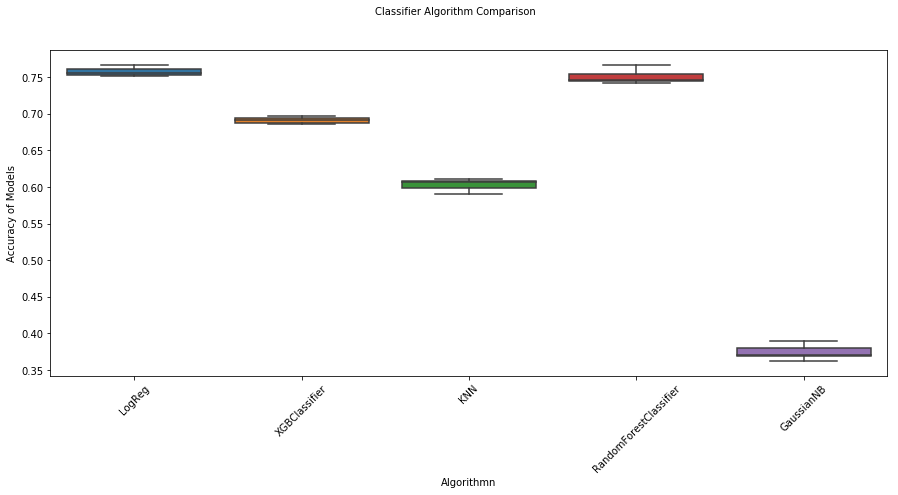

In [154]:
results_bow_uni, names_bow_uni  = [], [] 
for name, model in tqdm(clfs):
    cv_results = cross_val_score(model, 
                                 X_train_bow_unigram.toarray(), 
                                 Y_train, cv=5, 
                                 scoring=scoring, 
                                 n_jobs=-1)    
    names_bow_uni.append(name)
    results_bow_uni.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_bow_uni, y=results_bow_uni)
ax.set_xticklabels(names_bow_uni)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

With logistic regression and random forest, I received first scores above **75%** of accuracy (mean of cross-validation).
The accuracy estimations per model have short whiskers, indicating small standard deviations, which proves that dataset behaves predictable and order of tweets in the dataset does not matter for validation strategy (no dataset shuffling is needed). I could probably expect similar results for test set.

##### bigram

LogReg: 0.744875 (+/- 0.004797)
XGBClassifier: 0.690231 (+/- 0.003296)
KNN: 0.609803 (+/- 0.006214)
RandomForestClassifier: 0.754181 (+/- 0.009504)
GaussianNB: 0.428282 (+/- 0.008291)


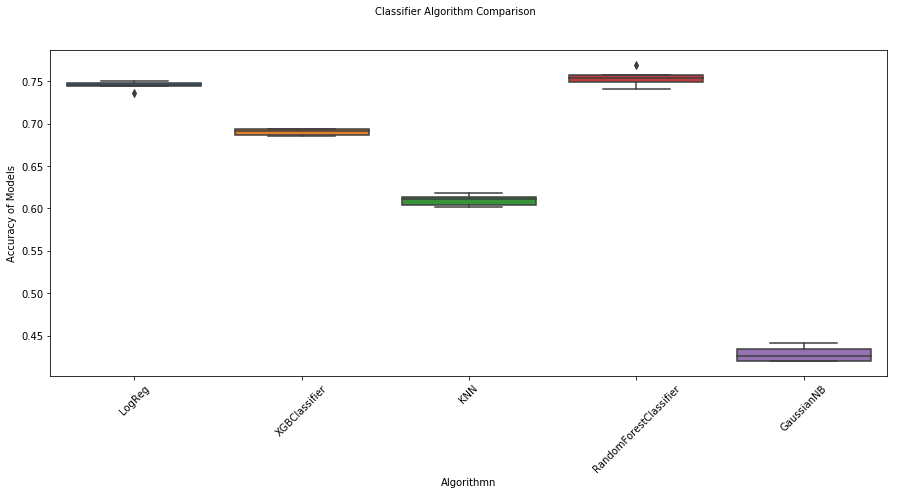

In [155]:
results_bow_bi, names_bow_bi  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, X_train_bow_bigram.toarray(), Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_bow_bi.append(name)
    results_bow_bi.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_bow_bi, y=results_bow_bi)
ax.set_xticklabels(names_bow_bi)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Bigram did not provide much of improvement in terms of accuracy in comparison to unigram approach.
Let's check the trigram bag of words approach.

##### trigram

LogReg: 0.745387 (+/- 0.003925)
XGBClassifier: 0.690231 (+/- 0.003296)
KNN: 0.609206 (+/- 0.007104)
RandomForestClassifier: 0.750764 (+/- 0.010381)
GaussianNB: 0.430161 (+/- 0.007809)


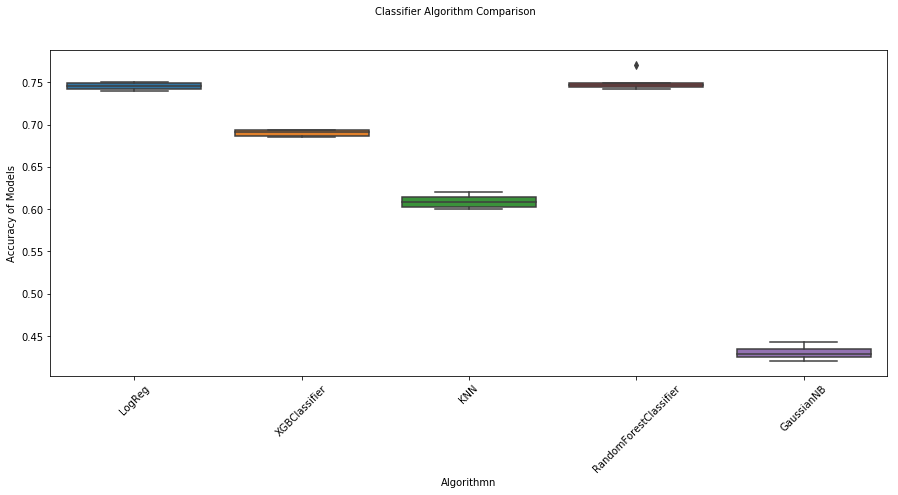

In [156]:
results_bow_tri, names_bow_tri  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, X_train_bow_trigram.toarray(), Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_bow_tri.append(name)
    results_bow_tri.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_bow_tri, y=results_bow_tri)
ax.set_xticklabels(names_bow_tri)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Very similar estimations for trigram. It shows that combinng together the words in bigram and trigram expressions does not bring any predicitve power for sentiment analysis. It looks like single words already capture necessary semantic for sentiment analysis. Taking into consideration the computaion cost of creating both bigram and trigram I do not see any advantage to use the over BOW unigram for this dataset.

As done for Bag of Words, let's perform similar analysis for TF-IDF matrices.
The best score so far is **75.77%**.

### Models based on TF-IDF

##### unigram

LogReg: 0.746586 (+/- 0.006256)
XGBClassifier: 0.696037 (+/- 0.006135)
KNN: 0.602545 (+/- 0.008974)
RandomForestClassifier: 0.751450 (+/- 0.003995)
GaussianNB: 0.365778 (+/- 0.013592)


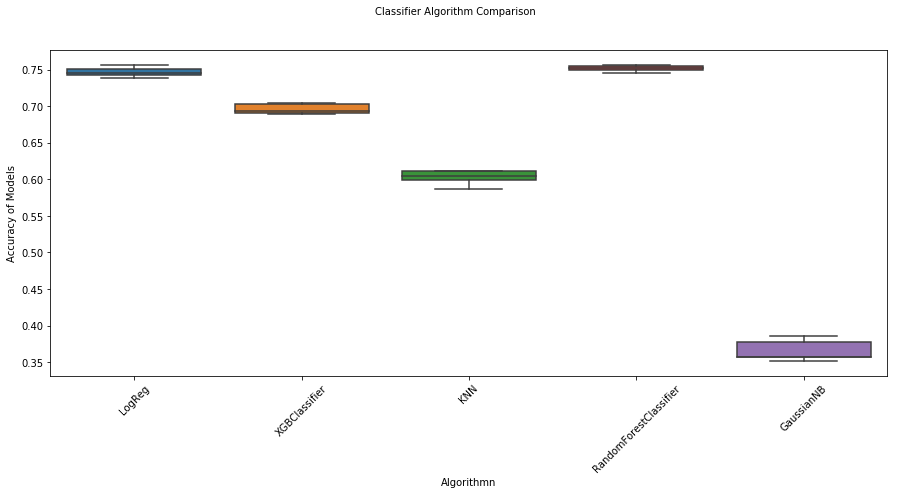

In [157]:
results_tfidf_uni, names_tfidf_uni  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, X_train_tfidf_unigram.toarray(), Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_tfidf_uni.append(name)
    results_tfidf_uni.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_tfidf_uni, y=results_tfidf_uni)
ax.set_xticklabels(names_tfidf_uni)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

##### bigram

LogReg: 0.740608 (+/- 0.006071)
XGBClassifier: 0.694329 (+/- 0.004293)
KNN: 0.600073 (+/- 0.012565)
RandomForestClassifier: 0.751451 (+/- 0.002554)
GaussianNB: 0.441600 (+/- 0.008852)


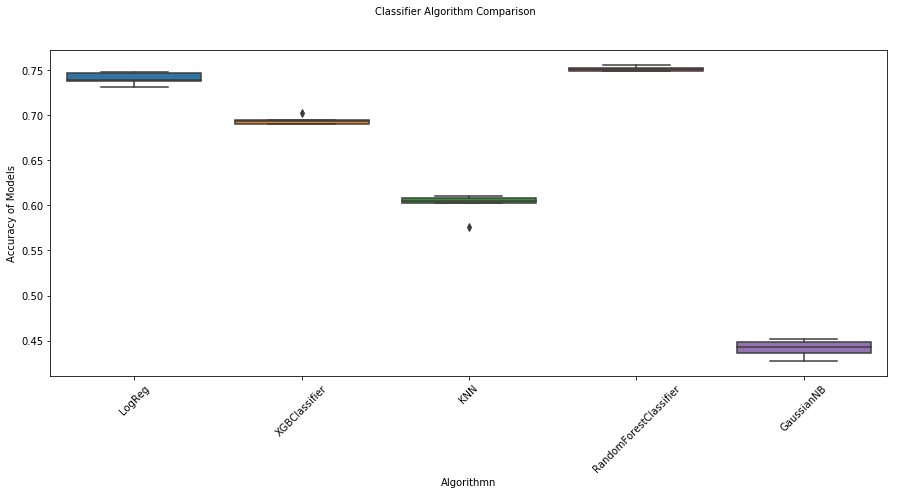

In [158]:
results_tfidf_bi, names_tfidf_bi  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, X_train_tfidf_bigram.toarray(), Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_tfidf_bi.append(name)
    results_tfidf_bi.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_tfidf_bi, y=results_tfidf_bi)
ax.set_xticklabels(names_tfidf_bi)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

##### trigram

LogReg: 0.740862 (+/- 0.008881)
XGBClassifier: 0.695525 (+/- 0.003692)
KNN: 0.600928 (+/- 0.013351)
RandomForestClassifier: 0.752987 (+/- 0.007377)
GaussianNB: 0.443223 (+/- 0.007481)


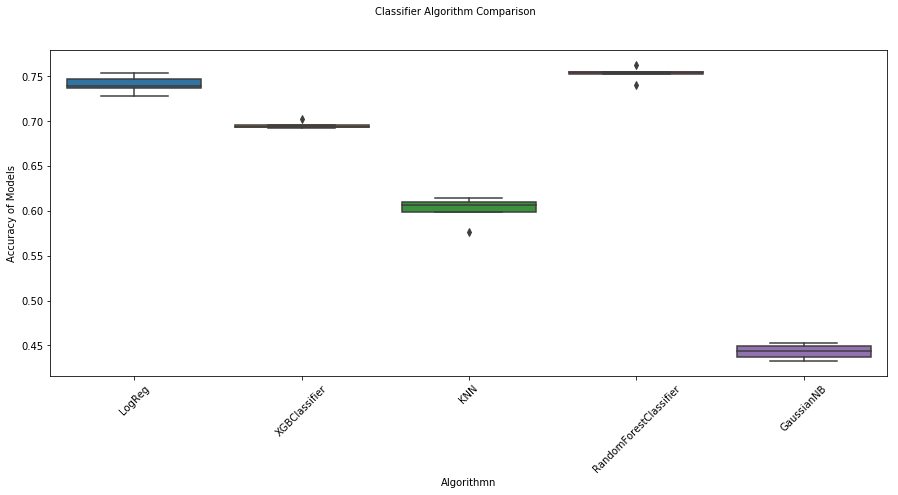

In [159]:
results_tfidf_tri, names_tfidf_tri  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, 
                                 X_train_tfidf_trigram.toarray(), 
                                 Y_train, 
                                 cv=5, 
                                 scoring=scoring, 
                                 n_jobs=-1)    
    names_tfidf_tri.append(name)
    results_tfidf_tri.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_tfidf_tri, y=results_tfidf_tri)
ax.set_xticklabels(names_tfidf_tri)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

The results for TF_IDF approach brought very similar results to BOW. My best score so far is **75.31%**
for TF-IDF unigram approach.

It is important to mention that results might be improved using different parameters for vectorizers, which would choose broader/narrower amount of words in sparse matrices. However the goal of this analysis is not to experiment with these approaches extensively (they might bring probably 1% this or that direction), I use them only as a low-hanging fruit benchmark for UMLFIT.

### Models based on  Word2vec

##### trained from scratch

LogReg: 0.741376 (+/- 0.005115)
XGBClassifier: 0.747183 (+/- 0.006041)
KNN: 0.706454 (+/- 0.005856)
RandomForestClassifier: 0.747782 (+/- 0.006560)
GaussianNB: 0.660092 (+/- 0.009183)


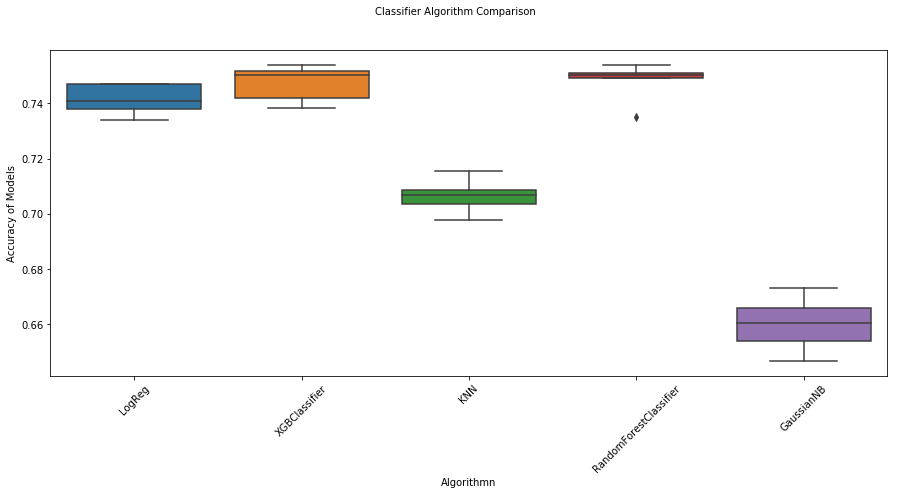

In [160]:
results_w2v_scr, names_w2v_scr,  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, 
                                 x_train_vecs, 
                                 Y_train, 
                                 cv=5, 
                                 scoring=scoring, 
                                 n_jobs=-1)    
    names_w2v_scr.append(name)
    results_w2v_scr.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_w2v_scr, y=results_w2v_scr)
ax.set_xticklabels(names_w2v_scr)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

The score of all 5 models is now much closer, worst for Naive Bayes reaching around 66% to 75% reached by random forest.
It looks that predictions using embeddings vectors are much more stable at the level of 70% and above irrespective the method applied.

##### pretrained Twitter 400

LogReg: 0.770065 (+/- 0.003832)
XGBClassifier: 0.733522 (+/- 0.003875)
KNN: 0.710892 (+/- 0.007386)
RandomForestClassifier: 0.724556 (+/- 0.004689)
GaussianNB: 0.675887 (+/- 0.006121)


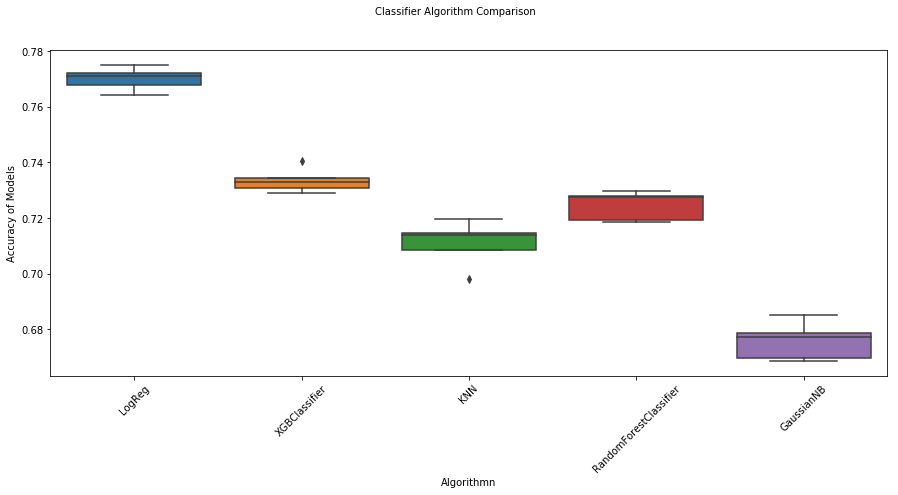

In [161]:
results_w2v_tw, names_w2v_tw,  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, x_train_vecs_twitter, Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_w2v_tw.append(name)
    results_w2v_tw.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_w2v_tw, y=results_w2v_tw)
ax.set_xticklabels(names_w2v_tw)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Using twitter pretrained embeddings increased the score for Logistic Regression. Now my best score is 
**77,01%** accuracy. The rest of models reached similar results as word2vec learned from scratch.

##### pretrained Google 300

LogReg: 0.762806 (+/- 0.006391)
XGBClassifier: 0.736252 (+/- 0.005665)
KNN: 0.720712 (+/- 0.004715)
RandomForestClassifier: 0.729762 (+/- 0.006109)
GaussianNB: 0.686050 (+/- 0.007604)


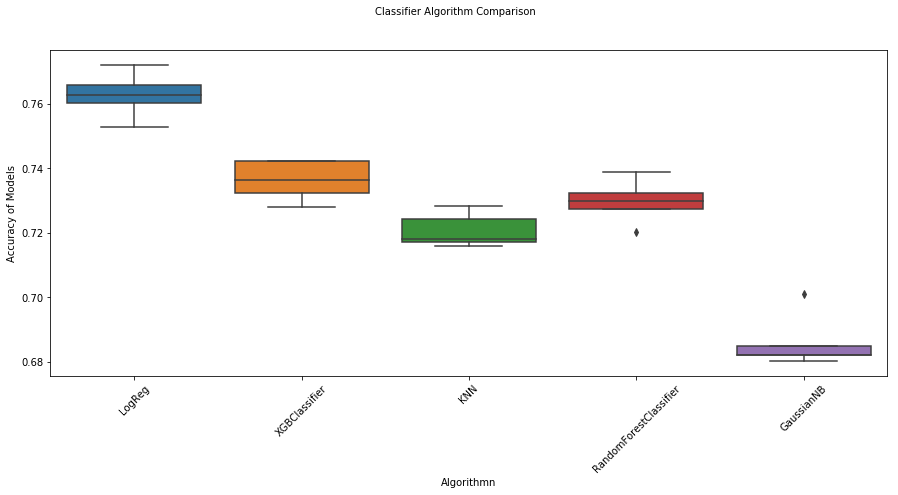

In [162]:
results_w2v_google, names_w2v_google,  = [], [] 
for name, model in clfs:
    cv_results = cross_val_score(model, x_train_vecs_google, Y_train, cv=5, scoring=scoring, n_jobs=-1)    
    names_w2v_google.append(name)
    results_w2v_google.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=10)
ax = fig.add_subplot(111)
sns.boxplot(x=names_w2v_google, y=results_w2v_google)
ax.set_xticklabels(names_w2v_google)
ax.set_xlabel("Algorithmn")
ax.set_ylabel("Accuracy of Models")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Results are very similar to accuracy reached by pretrained-twitter word2vec approach. 
Selecting 3 models for further optimisation I have decided for:
* Random forest - unigram tf-idf
<br> From BOW and TF-IDF methods I chose this model as it gave score arounf 75.3%. Logistic regression learned on unigram BOW reached 0.4% higher however, I think choosing better hypeter-parameters, espeicially increasing the number of trees I have better space for improvement than with logisitc regression and its regularization parameter.</br>
* Random forest - word2vec learned form scratch
<br>The accuracy was also close to 75%, best non-parametric result from word2vec models</br>
* Logistic regression - word2vec learned from pretrained-Twitter
<br>The model reached the bet accuracy so far 77%. Let's see if we can improve it.</br>

## Modelling - optimization of selected 3 algorithms.

For optimization I chose simple random search algorithm.
It randomly draws the parameters from defined domain and build the grid for optimum result searching.
In comparison to Grid  Search it might check more unlikely combination of parameters from the edges of provided domain.

### Random Forest - tfidf - unigram

In [163]:
# maximal depth of tree possible with my data
np.log2(X_train_tfidf_unigram.shape[0])

13.515699838284043

In [164]:

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None, 0.5]
max_depth = [9, 10, 13, None]
min_samples_split = np.random.choice(np.arange(5,20), 5,replace=False).astype(int)
min_samples_leaf = np.random.choice(np.arange(5,20), 5,replace=False).astype(int)

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': list(min_samples_split),
               'min_samples_leaf': list(min_samples_leaf),
               "n_estimators": [400, 700, 1000],
               "criterion"   : ["gini"]
               }

print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2', None, 0.5], 'max_depth': [9, 10, 13, None], 'min_samples_split': [17, 13, 5, 8, 14], 'min_samples_leaf': [11, 5, 14, 12, 8], 'n_estimators': [400, 700, 1000], 'criterion': ['gini']}


For validation purposes I chose 3-fold cross-validation methodm.

In [485]:
clf_random_search = RandomForestClassifier(oob_score=True,random_state=88,n_jobs = -1)

n_iter_search = 30
rs_cv_rf1 = RandomizedSearchCV(clf_random_search, 
                                   param_distributions=random_grid,
                                   n_iter=n_iter_search,
                                   cv = 3, 
                                   verbose=3,
                                   scoring ='accuracy',
                                   n_jobs = -1)

start = time()
rs_cv_rf1.fit(X_train_tfidf_unigram.toarray(), Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 89.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 162.0min finished


RandomizedSearchCV took 9748.19 seconds for 30 candidates parameter settings.


In [486]:
# top 5 models
results_pd = pd.DataFrame(rs_cv_rf1.cv_results_)
results_pd = results_pd.sort_values(by='mean_test_score', ascending=False)
results_pd.head(5).T

,1,18,26,6,5
mean_fit_time,77.8194,750.046,721.834,1776.88,3459.92
std_fit_time,0.892794,17.2776,17.5288,34.0144,67.0421
mean_score_time,0.928676,0.659554,0.810476,2.04258,1.82286
std_score_time,0.0379113,0.00540138,0.100979,0.154279,0.386212
param_n_estimators,400,400,400,1000,1000
param_min_samples_split,6,7,6,7,18
param_min_samples_leaf,6,6,8,11,11
param_max_features,auto,0.5,0.5,0.5,None
param_max_depth,None,None,None,None,None
param_criterion,gini,gini,gini,gini,gini


Looking at 5 best models, we can notice that on validation samples, we got comparable (slightly worse) results than without random search application.
Checking the training scores we slightly overfit. Let's see what is the score on the test set as this will be used as benchmark.

In [488]:
#Classifcation report
y_pred=rs_cv_rf1.best_estimator_.predict(X_test_tfidf_unigram.toarray())
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1835
           1       0.66      0.40      0.50       632
           2       0.73      0.55      0.63       461

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928



Looking at the classiication report, 
I hit quite well the negative sentiment class (78% of precision), 
slightly worse positive sentiment (73% of precision) and worse the medium sentiment class (66%).
It might stem from fact that the positive and medium class are underrepresented in training set in comparison to negative sentiment class. For medium the words probably do not have that much distinctive predicting power.

In [73]:
# Code to plot normalized confusion matrix with appropriate colouring and numbers

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Predicted label',
           xlabel='True label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.77576033 0.24010554 0.10115607]
 [0.14661825 0.66226913 0.16763006]
 [0.07762143 0.09762533 0.73121387]]

Accuracy score: 0.7558060109289617


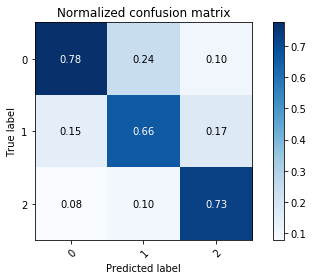

In [489]:
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=['Negative', 'Medium', 'Positive'], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, y_pred))
None

My first test set accuracy equals to **75.58%**.

### Random Forest - word2vec - trained from scratch

In [359]:
# maximal depth of tree possible with our data
np.log2(x_train_vecs.shape[0])

13.515699838284043

In [360]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None, 0.5]
max_depth = [9, 10, 13, None]
min_samples_split = np.random.choice(np.arange(5,20), 5,replace=False).astype(int)
min_samples_leaf = np.random.choice(np.arange(5,20), 5,replace=False).astype(int)

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': list(min_samples_split),
               'min_samples_leaf': list(min_samples_leaf),
               "n_estimators": [400, 700, 1000],
               "criterion"   : ["gini"]
               }

print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2', None, 0.5], 'max_depth': [9, 10, 13, None], 'min_samples_split': [6, 8, 11, 7, 17], 'min_samples_leaf': [15, 18, 17, 14, 12], 'n_estimators': [400, 700, 1000], 'criterion': ['gini']}


In [364]:
clf_random_search = RandomForestClassifier(oob_score=True,random_state=88,n_jobs = -1)

n_iter_search = 30
random_search_cv = RandomizedSearchCV(clf_random_search, 
                                   param_distributions=random_grid,
                                   n_iter=n_iter_search,
                                   cv = 3, 
                                   verbose=3,
                                   scoring ='accuracy',
                                   n_jobs = -1)

start = time()
random_search_cv.fit(x_train_vecs, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 151.9min finished


RandomizedSearchCV took 9416.02 seconds for 30 candidates parameter settings.


In [365]:
# top 5 models
results_pd = pd.DataFrame(random_search_cv.cv_results_)
results_pd = results_pd.sort_values(by='mean_test_score', ascending=False)
results_pd.head(5).T

,28,24,13,22,4
mean_fit_time,711.222,368.023,983.024,1558.43,845.905
std_fit_time,18.7926,9.23587,23.2987,6.39886,7.79998
mean_score_time,0.572842,0.240962,0.650854,0.677278,0.758159
std_score_time,0.0417579,0.00904643,0.00667874,0.0537776,0.090373
param_n_estimators,700,400,1000,1000,1000
param_min_samples_split,7,17,11,7,8
param_min_samples_leaf,12,18,14,14,14
param_max_features,0.5,0.5,0.5,None,0.5
param_max_depth,None,None,None,10,10
param_criterion,gini,gini,gini,gini,gini


In [467]:
#Classifcation report
y_pred=random_search_cv.best_estimator_.predict(x_test_vecs)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1835
           1       0.65      0.38      0.48       632
           2       0.73      0.54      0.62       461

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.72      0.62      0.65      2928
weighted avg       0.74      0.75      0.73      2928



Normalized confusion matrix
[[0.77342342 0.22404372 0.10526316]
 [0.15135135 0.65300546 0.16666667]
 [0.07522523 0.12295082 0.72807018]]

Accuracy score: 0.7530737704918032


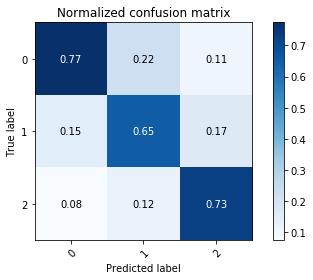

In [472]:
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=[0,1,2], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, y_pred))
None

My second test set accuracy equals to **75.30%**.

### Logistic Regression - word2vec (Twitter 400)

In [458]:
# Regularization penalty space
penalty = ['l1', 'l2']

# Regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Hyperparameter options
hyperparameters = dict(logistic__C=C, logistic__penalty=penalty)

In [461]:
pipe = Pipeline([
            ("Scaler", StandardScaler()), # added scaler and PCA again
            ('pca', PCA(n_components=0.95)),
            ('logistic', LogisticRegression())
        ])

rs_cv_LogReg = RandomizedSearchCV(pipe, 
                                    hyperparameters, 
                                    random_state=88, 
                                    n_iter=100, 
                                    cv=3, 
                                    verbose=3, 
                                    n_jobs=-1)

start = time()
rs_cv_LogReg.fit(x_train_vecs_twitter, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), 30))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV took 217.40 seconds for 30 candidates parameter settings.


In [462]:
results_pd = pd.DataFrame(rs_cv_LogReg.cv_results_)
results_pd = results_pd.sort_values(by='mean_test_score', ascending=False)
results_pd.head(5).T

,20,29,69,88,72
mean_fit_time,1.98014,2.2447,2.03393,1.89197,2.08138
std_fit_time,0.0085647,0.156668,0.0644847,0.0803925,0.0382381
mean_score_time,0.0670147,0.0745912,0.0579569,0.0618451,0.0676847
std_score_time,0.00399163,0.0132886,0.00233578,0.00513088,0.00247546
param_logistic__C,0.128651,0.16318,0.183089,0.0720822,0.330245
param_logistic__penalty,l1,l1,l1,l1,l1
params,"{'logistic__C': 0.12865112949711532, 'logistic__penalty': 'l1'}","{'logistic__C': 0.16317955315386978, 'logistic__penalty': 'l1'}","{'logistic__C': 0.18308934378631214, 'logistic__penalty': 'l1'}","{'logistic__C': 0.07208220345141969, 'logistic__penalty': 'l1'}","{'logistic__C': 0.3302450090523976, 'logistic__penalty': 'l1'}"
split0_test_score,0.777465,0.775928,0.774904,0.776953,0.77388
split1_test_score,0.76998,0.770492,0.770492,0.768699,0.771516
split2_test_score,0.771458,0.770433,0.769921,0.768896,0.768896


The training score looks similar as for Random Forest, but for cross-validation score I reached more than 77% which is better then 2 previous algorithms. It looks like logisitc regression  do slightly less overfitting.

In [473]:
#Classifcation report
y_pred=rs_cv_LogReg.best_estimator_.predict(x_test_vecs_twitter)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1835
           1       0.63      0.44      0.52       632
           2       0.77      0.66      0.71       461

   micro avg       0.78      0.78      0.78      2928
   macro avg       0.74      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



Normalized confusion matrix
[[0.81070746 0.239819   0.08375635]
 [0.14005736 0.63348416 0.14974619]
 [0.04923518 0.12669683 0.76649746]]

Accuracy score: 0.7780054644808743


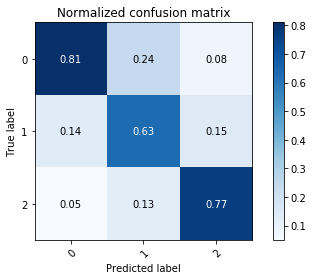

In [474]:
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=[0,1,2], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, y_pred))
None

My test score equals to **77.80%!**.
With logistic regression I improved with hitting negative and positive sentiment class by a few percent in comparison to previous model.
I lost slightly on neutral sentiment class.
This is the best result I have reached so far.

## TPOT

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.
I would like to check with Auto-ML algorithm whether I do not loose much making an arbitrary decision on model selection. If the best results from automatic search will be quite similar to mine 77,8%, it means that I can easily move forward to deep learning to see if neural network can improve my score.

For X matrix I will use x learned from scratch via word2vec(x_train_vecs).

In [106]:
tpot = TPOTClassifier(verbosity=2, 
                      scoring="accuracy", 
                      random_state=88, 
                      periodic_checkpoint_folder="tpot_update.txt", 
                      n_jobs=-1, 
                      generations=3, 
                      population_size=30,
                      config_dict='TPOT light')

### word2vec - learned from scratch

As a validation method, I decided to split train again into 80% and 20% (cross validation would be a killer for this).

In [107]:
X_train_tpot, X_val_TPOT, Y_train_TPOT, Y_val_TPOT = train_test_split(x_train_vecs, Y_train, test_size=0.2, random_state=88)

In [108]:
X_train_tpot.shape,X_val_TPOT.shape,Y_train_TPOT.shape, Y_val_TPOT.shape

((9369, 300), (2343, 300), (9369,), (2343,))

In [109]:
times = []
scores = []
winning_pipes = []

# run three iterations 
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train_tpot, Y_train_TPOT)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_val_TPOT, Y_val_TPOT))
    tpot.export('tpot_pipeline_update.py')
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Generation 1 - Current best internal CV score: 0.7520533323144136
Generation 2 - Current best internal CV score: 0.7520533323144136
Generation 3 - Current best internal CV score: 0.7549356680707471

Best pipeline: LogisticRegression(PCA(input_matrix, iterated_power=6, svd_solver=randomized), C=20.0, dual=False, penalty=l1)


Generation 1 - Current best internal CV score: 0.7520533323144136
Generation 2 - Current best internal CV score: 0.7520533323144136
Generation 3 - Current best internal CV score: 0.7549356680707471

Best pipeline: LogisticRegression(PCA(input_matrix, iterated_power=6, svd_solver=randomized), C=20.0, dual=False, penalty=l1)


Generation 1 - Current best internal CV score: 0.7520533323144136
Generation 2 - Current best internal CV score: 0.7520533323144136
Generation 3 - Current best internal CV score: 0.7549356680707471

Best pipeline: LogisticRegression(PCA(input_matrix, iterated_power=6, svd_solver=randomized), C=20.0, dual=False, penalty=l1)
Times: [35.0245425219667, 35.49208224521717, 35.363673130083285]
Scores: [0.7652582159624414, 0.7652582159624414, 0.7652582159624414]
Winning pipelines: [Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power=6, n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=20.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]), Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterate

I use best pipeline and train it in training set once more to get predictions. Then I build classification report and confusion matrix.

In [127]:
# Train the best pipeline on whole training and predict test.
exported_pipeline = make_pipeline(
    PCA(iterated_power=6, svd_solver="randomized"),
    LogisticRegression(C=20.0, dual=False, penalty="l1")
)

exported_pipeline.fit(X_train_tpot, Y_train_TPOT)
results = exported_pipeline.predict(x_test_vecs)

In [128]:
print(classification_report(Y_test, results))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1835
           1       0.62      0.42      0.50       632
           2       0.74      0.60      0.66       461

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.72      0.65      0.67      2928
weighted avg       0.75      0.77      0.75      2928



Normalized confusion matrix
[[0.79905882 0.22535211 0.10875332]
 [0.14494118 0.62441315 0.15384615]
 [0.056      0.15023474 0.73740053]]

Accuracy score: 0.7657103825136612


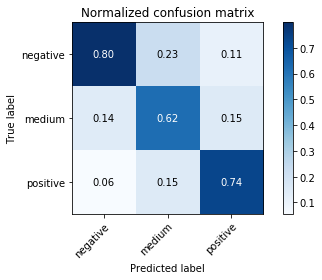

In [129]:
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results, classes=['negative','medium','positive'], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, results))
None

The best model found by TPOT from scikit-learn occurs to be similar to my model: logistic regression.
With a bit different cost and PCA parameters, a TPOT received 76.57% whereas my logistic regression (word2vec from scratch, not optimized) reached 74.46%. So with this automatic approach I gained 2%, which is some kind of hyper-parameter tuning.
Being satisfied with this improvement, I will check TPOT approach on pretrained-twitter word2vec where so far I reached highest result.

### word2vec - twitter pretrained

In [114]:
X_train_TPOT2, X_val_TPOT2, Y_train_TPOT2, Y_val_TPOT2 = train_test_split(x_train_vecs_twitter, Y_train, test_size=0.2, random_state=88)

In [115]:
X_train_TPOT2.shape,X_val_TPOT2.shape,Y_train_TPOT2.shape, Y_val_TPOT2.shape

((9369, 400), (2343, 400), (9369,), (2343,))

In [116]:
times2 = []
scores2 = []
winning_pipes2 = []

# run three iterations and time them
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train_TPOT2, Y_train_TPOT2)
    elapsed = timeit.default_timer() - start_time
    times2.append(elapsed)
    winning_pipes2.append(tpot.fitted_pipeline_)
    scores2.append(tpot.score(X_val_TPOT2, Y_val_TPOT2))
    tpot.export('tpot_pipeline_update2.py')
times = [time/60 for time in times]
print('Times:', times2)
print('Scores:', scores2)   
print('Winning pipelines:', winning_pipes2)

Generation 1 - Current best internal CV score: 0.76560620828672
Generation 2 - Current best internal CV score: 0.76560620828672
Generation 3 - Current best internal CV score: 0.76560620828672

Best pipeline: LogisticRegression(input_matrix, C=0.5, dual=False, penalty=l1)


Generation 1 - Current best internal CV score: 0.76560620828672
Generation 2 - Current best internal CV score: 0.76560620828672
Generation 3 - Current best internal CV score: 0.76560620828672

Best pipeline: LogisticRegression(input_matrix, C=0.5, dual=False, penalty=l1)


Generation 1 - Current best internal CV score: 0.76560620828672
Generation 2 - Current best internal CV score: 0.76560620828672
Generation 3 - Current best internal CV score: 0.76560620828672

Best pipeline: LogisticRegression(input_matrix, C=0.5, dual=False, penalty=l1)
Times: [863.5742710100021, 865.164232325973, 864.4936352180084]
Scores: [0.7789159197609902, 0.7789159197609902, 0.7789159197609902]
Winning pipelines: [Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]), Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=N

In [131]:
# Train the best pipeline on whole training and predict test.
exported_pipeline = LogisticRegression(C=0.5, dual=False, penalty="l1")

exported_pipeline.fit(X_train_TPOT2, Y_train_TPOT2)
results = exported_pipeline.predict(x_test_vecs_twitter)

In [132]:
print(classification_report(Y_test, results))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1835
           1       0.66      0.44      0.53       632
           2       0.78      0.64      0.70       461

   micro avg       0.78      0.78      0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



Normalized confusion matrix
[[0.80810938 0.21596244 0.07611549]
 [0.13955681 0.657277   0.14698163]
 [0.0523338  0.12676056 0.77690289]]

Accuracy score: 0.782103825136612


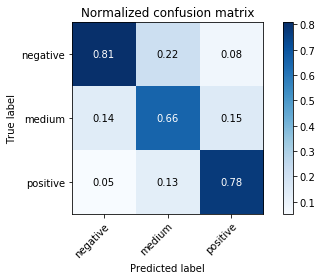

In [133]:
# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results, classes=['negative','medium','positive'], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, results))
None

Again the logistic regression occured to be the best model. 
My previous best score was 77.8% (logistic regression optimised through random search). Now my best score is **78.2%**. 

In the end let's train the best model on the whole training set rather than its 0.8 part. It might slightly improve prediction.

Normalized confusion matrix
[[0.80573848 0.21291866 0.0859375 ]
 [0.14158043 0.65789474 0.14583333]
 [0.05268109 0.1291866  0.76822917]]

Accuracy score: 0.7797131147540983


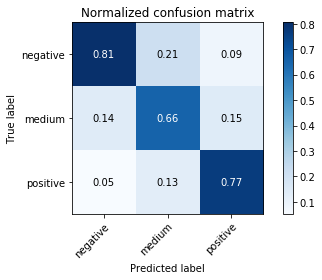

In [137]:
exported_pipeline_all_train = LogisticRegression(C=0.5, dual=False, penalty="l1")

exported_pipeline_all_train.fit(x_train_vecs_twitter, Y_train)
results2 = exported_pipeline_all_train.predict(x_test_vecs_twitter)

plot_confusion_matrix(Y_test, results2, classes=['negative','medium','positive'], normalize=True,
                      title='Normalized confusion matrix')
print()
print('Accuracy score:',accuracy_score(Y_test, results2))
None

The accuracy dropped minimally so with TPOT and vectors trained on external twitter dataset I get around 78% of accuracy.
This ends my ML modelling part.

# Conclusion

**Conclusions:**
<br> Below points refer only to modelling part, it is clear I could increase accuracy by processing twitter data in different way (will be done in deep learning section).
* I reached **78.2%** with classical Machine Learning algorithms.
* I think that due to rather shallow vocabulary (additionally cleaned quite conservatively by my function) and due to short length of tweets, the algorithms like word2vec could not bring much additional value for accuracy prediction. Learning word2vec from scratch on such short text data, does not allow to capture the semantic of words appropriately (I chose only 5 neighbours of cleaned text, which seems reasonable for 20 words long tweets). Using pretrained models with 300, 400 defined vector dimension might be a bit too extensive dimensionality for my short vocabulary.
* Using word2vec I calculated the average representation of the tweet (I could summed them as well). This might cause the loss of information. The tweets quite often contain the particular word indicating sentiment and additionally contain some other non-informative words. Averaging might neutralize the predictive effect of this one word by number of non-informative words. It would be better if I use algorithm which treats each word separately and then make a decision, rather then average meaning across whole tweet text.
* BOW and TF-IDF might be a good simple choice for first modelling attempts. However, due to the fact that they are computationally expensive I would not use them. The experiments with vectorizers parameters might change however the accuracy of the model as I chose quite conservative parameters which reduced vocabulary size.
* In order to improve the accuracy not through the feature engineering but through ML modelling I would suggest following:
    * to experiment more with different model hyper-parameters, both parameters of the classifiers as well as the parameters of text vectorizers (BOW, TF-IDF, Word2vec)
    * to experiment with other pretrained models containing embeddings like Glove, Doc2vec
    * try blending and stacking (however TPOT which does that did not choosed staked model as this with best accuracy).
<br> However I do not think any of these points would significantly improve accuracy based on the same twitter text. <br>

Having reached my score around **78.2**%, I stop experimenting further with classical ML approaches and try deep learning based on LSTM modelling to see how I can improve there.